# Progetto FAD 25-26

Progetto di gruppo per il corso di *Fondamenti di Analisi dei Dati* — A.A. 2025/2026

**Nome del gruppo**: *The Bayesians*

**Membri del gruppo**:
- *Filippo Falzone*  
- *Francesco Greco*

Il progetto si basa sullo studio di un dataset contenente informazioni circa varie automobili vendute.
I dati sono stati raccolti in India e le auto vendute sono usate. Quindi lo studio si baserà sul comprendere il mercato delle automobili usate in India.

---

## 1. Analisi dei dati

Questa fase iniziale è dedicata alla **comprensione approfondita del dataset**. Si procede con l'esplorazione, la pulizia dei dati (data cleaning) per gestire valori mancanti e anomalie, e l'analisi descrittiva per inferire le prime caratteristiche e tendenze chiave delle variabili.

### Data Understanding

Ci concentreremo sull'iniziare a conoscere il dataset, comprendendo a fondo il significato di ogni variabile e formulando alcune domande su cui strutturare le successive fasi dell'analisi dei dati.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data_set/train-data.csv', index_col=0)

# 'df_clean' coneterrà il dataset pulito
df_clean = df.copy()

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


Vediamolo nel dettaglio:

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 125.3+ KB


> Il nostro dataset ha **13 caratteristiche** (colonne) e **6019 osservazioni** (righe).

Adesso creiamo un dizionario dei dati, in modo da avere una comprensione maggiore delle varie caratteristiche.

**Dizionario dei Dati**
| Variabile             | Tipo / Scala                     | Descrizione                                                                                         | Unità / Note |
| --------------------- | -------------------------------- | --------------------------------------------------------------------------------------------------- | ------------ |
| **Name**              | Qualitativa / Nominale           | Combinazione di marchio e modello dell’auto. | –            |
| **Location**          | Qualitativa / Nominale           | Città o regione in cui l’auto è in vendita.                                                         | –            |
| **Year**              | Numerica / Discreta / Intervalli | Anno di produzione del modello.                | –            |
| **Kilometers_Driven** | Numerica / Continua / Ratio      | Chilometri totali percorsi dall’auto.                                                               | km           |
| **Fuel_type**         | Qualitativa / Nominale           | Tipo di carburante utilizzato dall’auto.                                                            | –            |
| **Transmission**      | Qualitativa / Nominale            | Tipo di trasmissione: `automatica` o `manuale`.                                                         | –            |
| **Owner_Type**        | Qualitativa / Ordinale           | Indica il numero di proprietari precedenti che il veicolo ha avuto prima del venditore attuale. Le categorie sono ordinate per numero crescente di proprietari: `first_hand` (il venditore è il primo proprietario), `second_hand`, `third_hand`, e `fourth_above` (quattro o più proprietari).                            | –            |
| **Mileage**           | Numerica / Continua / Ratio      | Consumo di carburante dell’auto.                                               | kmpl o km/kg |
| **Engine**            | Numerica / Continua / Ratio      | Cilindrata del motore.                                                                              | cc           |
| **Power**             | Numerica / Continua / Ratio      | Potenza massima del motore.                                                                         | bhp          |
| **Seats**             | Numerica / Discreta / Ratio      | Numero di posti a sedere.            | –            |
| **New_Price**         | Numerica / Continua / Ratio      | Rappresenta il prezzo di un auto nuova dello stesso modello.                                                         | INR Lakhs    |
| **Price**             | Numerica / Continua / Ratio      | Prezzo di vendita dell’auto usata.                 | INR Lakhs    |


Alcune considerazioni sulle variabili:
- da `Name` potremmo estrarre marchio dell'auto e modello
- da `Year` possiamo calcolare l'età dell'auto
- `Transmission` è una variabile binaria (ha solo due possibili categorie)
- modifica di `Owner_Type` in modo da renderla discreta ordinale
- `Seats` può aiutare a classificare il veicolo (SUV, sportiva, etc...)
- individuiamo `Price` come variabile target da predire per nuove osservazioni

**Obiettivi dell'Analisi dei Dati**


Dopo aver descritto e compreso le varie caratteristiche del dataset abbiamo formulato alcuni **obiettivi** su cui basare la nostra analisi dei dati, che ricordiamo basarsi sullo studio del mercato di auto usate in India:
- Quali sono i fattori principali che determinano il prezzo (`Price`) di un'auto usata? 
- In che modo l'età dell'auto (derivata da `Year`) e i chilometri percorsi (`Kilometers_Driven`) interagiscono nel definire il valore?
- Quale impatto hanno le caratteristiche tecniche come il motore o la potenza (`Engine` o `Power`) e il tipo di cambio (`Transmission`) sul prezzo?
- Esistono marche (estratte da `Name`) o località (`Location`) specifiche in cui le auto mantengono meglio il loro valore?  

---

### Data Cleaning & Preparation

È molto importate preparare il dataset prima di poter iniziare ad analizzare le variabili e come essere sono correlate. Questo perché eventuali valori mancanti o anomalie (outlier) ci porterebbo a conclusioni errate o inconsistenti.

Cominciamo dando un occhiata ai **valori mancanti** (Nan) presenti nelle nostre colonne:

In [419]:
print(df.isna().sum())

print("")

print("---- Nan percentage per variable ----")
for x in df:
    if df[x].isnull().sum() > 0:
        value = (df[x].isna().sum()/len(df[x])) * 100
        print(f"{x}: {value:.2f}%")

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

---- Nan percentage per variable ----
Engine: 0.81%
Power: 0.81%
Seats: 0.89%
New_Price: 85.25%


Vediamo che la maggior parte delle colonne contengono una **quantità irrilevanti di valori mancati**. Quelli che sono presenti (i missing values) si possono sistemare facilmente: o eliminiamo quelle righe, oppure facendo un'imputazione veloce utilizzando la media o la mediana.

Tuttavia `New_Price` è un **disastro**: 5195 su 6019 righe sono vuote. Parliamo dell'86% dei dati.

- **Imputazione**: impossibile, Il prezzo di listino dello stesso modello è troppo specifico; non possiamo stimarlo tramite le caratteristiche presenti in questo dataset. Non è come stimare il chilometraggio, questo è un valore che dipende da altre variabili.

- **Inutilizzabile**: Avere così tanti buchi rende la colonna inutile sia per un analisi e sia per la fase di modeling. Non possiamo farci affidamento.

Verifichiamo se nel nostro dataset sono presenti **righe duplicate**, che porterebbero ad un analisi non corretta, e nel caso eliminarle:

In [420]:
duplicate_count = df_clean.duplicated().sum()

df_clean.drop_duplicates(inplace=True)

print(f"Rimosse di n. righe duplicate: {duplicate_count}")


Rimosse di n. righe duplicate: 1


Adesso eseguiremo **per ogni caratterisitca** un processo di Data Cleaning che includerà:
- gestione dei Valori Mancanti
- Correzzione di Inconsistenze e Formattazione 
- Gestione degli outliers

**1. `Name`**

Ricordiamo che 'Name' contiene il brand e il modello dell'auto in osservazione.

> Contiene una stringa '\<brand> <modello>'

Inoltre, come abbiamo verificato poco fa, non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per la variabile 'Name', che include sia il brand che il modello del veicolo, abbiamo deciso di applicare Feature Engineering per scomporre questa stringa in due nuove variabili distinte: Brand e Model. Questo perché, anche se la variabile 'Name' è pulita, l'analisi e la modellazione predittiva traggono molti benefici da variabili con un unico scopo ben definito. 

Creeremo quindi le due nuove variabili Brand e Model estraendole dalla stringa originale.

In [421]:
df_clean['Brand'] = df_clean['Name'].str.split(' ').str[0]
df_clean['Model'] = df_clean['Name'].str.split(' ').str[1]
df_clean = df_clean.drop('Name', axis=1)

first_cols = ['Brand', 'Model']

remaining_cols = [col for col in df_clean.columns if col not in first_cols]

df_clean = df_clean[first_cols + remaining_cols]

print("Model e Brand creati e inseriti come prime due colonne.")

df_clean = df_clean.reset_index(drop=True)

df_clean.head()

Model e Brand creati e inseriti come prime due colonne.


,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


Non è necessario alcun controllo degli outlier nelle due nuove colonne create.

**2. `Location`**

Ricordiamo che 'Location' contiene il luogo in cui l'auto è stata venduta.

> Contiene una stringa \<location>

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Non sono necessari controlli su questa variabile, potremmo controllare se i nomi dei luoghi assunti da essa **esistono veramente**. Lo faremo ma solo per ottenere **informazioni circa i luoghi** in cui queste auto sono state rivendute:

In [422]:
print(df_clean['Location'].unique())
print("")
print(df_clean['Location'].value_counts())

['Delhi' 'Coimbatore' 'Mumbai' 'Hyderabad' 'Pune' 'Jaipur' 'Chennai'
 'Kochi' 'Bangalore' 'Kolkata' 'Ahmedabad']

Location
Mumbai        158
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: count, dtype: int64


Abbiamo esaminato i luoghi riportati sopra, non solo essi non sono frutto di errore o fantasia, ma sono tutte **grandi città metropolitane** indiane.

Non è necessario alcun controllo degli outlier per questa variabile.

**3. `Year`**

Questa variabile indica l'anno in cui l'auto è stata prodotta.

> Contiene un valore discreto.

Come visto prima non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per questa variabile non servono particolari controlli di questo tipo. Ma possiamo applicare pure qui un po di Feature Engeneering per trarre l'età dell'auto. Questo perché a noi non interessa sapere l'anno di fabbricazione, ma è l'età dell'auto che influisce sul prezzo.

Sembra che il dataset utilizzi come anno di riferimento il 2019, quindi l'età è la differenza Anno_di_produzione - Year.

Creeremo quindi la variabile `Age`:

In [423]:
ANNO_DI_RIFERIMENTO = 2019

index_year = df_clean.columns.get_loc('Year')
age_values = ANNO_DI_RIFERIMENTO - df_clean['Year']
df_clean.insert(index_year, 'Age', age_values)
df_clean.drop('Year', axis=1, inplace=True)

print('Age creata con successo.')

Age creata con successo.


*Gestione degli Outlier*

Inizieremo mostrando un boxplot per questa variabile:

<Axes: >

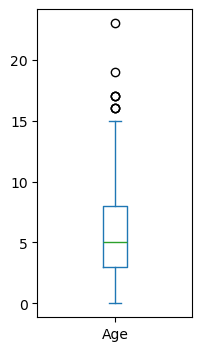

In [424]:
df_clean['Age'].plot.box(figsize=(2,4))

Age (Year) non presenta molti outlier, con molta probabilità sono auto molto vecchie che seguono normative ed un mercato differente, che potrebbero portare solamente a confusione. Abbiamo scelto d rimuovere le auto più vecchie di 14 anni (2005).

In [425]:
threshold = 14
auto_vecchie = df_clean[df_clean['Age'] > threshold]

df_clean = df_clean[df_clean['Age'] <= threshold]
df_clean.reset_index(drop=True, inplace=True)

print(f"Numero di auto rimosse: {len(auto_vecchie)}")

Numero di auto rimosse: 12


**4. `Kilometers_Driven`**

Questa variabile contiene quanti chilometri ha percorso l'auto.

> Contiene un valore continuo

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Questa variabile è gia pulita, non ci sono particolari controlli da fare

*Gestione degli outliers*

Inizieremo plottando un boxplot:

<Axes: >

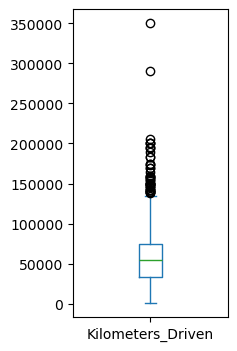

In [426]:
df_clean['Kilometers_Driven'].plot.box(figsize=(2,4))

Si nota subito quel numero spaventoso lì in alto, sicuramente impossibile. Sicuramente un errore. Meglio rimuoverlo.

Ci aspetteremmo comunque che auto che superino il milione di chilometri percorsi siano outliers. Perché potrebbero essere sia errori dovuti all'inserimento e sia auto molto molto vecchie.

In [427]:
print("Outlier estremi:")
print(df_clean[df_clean['Kilometers_Driven'] >= 1000000])

df_clean = df_clean[df_clean['Kilometers_Driven'] < 1000000]
df_clean.reset_index(drop=True, inplace=True)

Outlier estremi:
Empty DataFrame
Columns: [Brand, Model, Location, Age, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price]
Index: []


Plottiamo di nuovo il boxplot:

<Axes: >

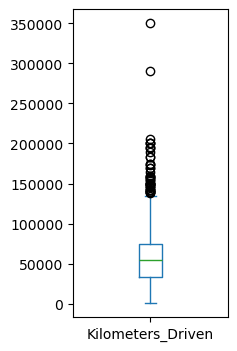

In [428]:
df_clean['Kilometers_Driven'].plot.box(figsize=(2,4))

Vogliamo sistemare questi outlier imputando il 99° percentile. Perché i valori sono troppo distanti, potrebbe portare solo che rumore al modello. Inoltre nel mercato odierno già sopra un tot chilometri sarebbero da rottamare le auto. Quindi potremmo usare il 99° percentile proprio per dire al modello di considerare l'auto massimamente usata, dato che dopo una certa soglia non c'è quasi nulla più da togliere. 

Soglia (99%): 174711 km


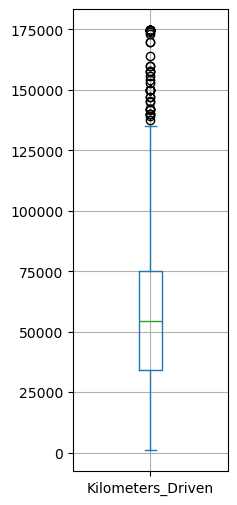

In [429]:
soglia_99 = df_clean['Kilometers_Driven'].quantile(0.99)
print(f"Soglia (99%): {soglia_99:.0f} km")

df_clean['Kilometers_Driven'] = np.where(df_clean['Kilometers_Driven'] > soglia_99, 
                                   soglia_99, 
                                   df_clean['Kilometers_Driven'])

df_clean.reset_index(drop=True, inplace=True)

df_clean['Kilometers_Driven'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Sembra che non ci sia altro da fare per questa variabile.

**5. `Fuel_Type`**

'Fuel_Type' contiene il tipo di carburante utilizzato dall'auto.

> Contiene una stringa '\<tipo_di_carburante>'

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [430]:
df_clean['Fuel_Type'].value_counts()

Fuel_Type
Diesel    645
Petrol    568
CNG         6
LPG         2
Name: count, dtype: int64

Notiamo subito il duopolio Diesel e Petrol, poi ci sono alcune nicchie. 

La presenza di auto che fanno uso di 'CNG' e 'LPG' e di auto elettriche è un po' problematica. La poca presenza nel dataset potrebbe indicare che c'è **poco mercato** nella regione di studio per auto di questa tipologia.

Inoltre, come vedremo più avanti, la caratteristica `Mileage` (chilometri percorsi per quantità utilizzata di carburante) utilizza due differenti unità di misura: una per 'Diesel' e 'Petrol ed una per 'LPG' e 'CNG', addirittura ha valori nulli per 'Electric'. Rendendo più complessa la loro gestione.

Data la scarsità di informazioni e la bassa rappresentatività di queste nicchie, uno studio approfondito che le includa risulterebbe eccessivamente complesso e poco significativo.

Pertanto, per ottimizzare l'analisi, la decisione è di escludere le tipologie di carburante 'Electric', 'CNG' e 'LPG' dal dataset.

In [431]:
# Rimuoviamo le auto elettriche
df_clean = df_clean[(df_clean['Fuel_Type'] != 'Electric') & (df_clean['Fuel_Type'] != 'CNG') & (df_clean['Fuel_Type'] != 'LPG')]

df_clean = df_clean.reset_index(drop=True)

print("Nicchie rimosse.")

Nicchie rimosse.


Per Fuel_Type non è necessario alcuna gestione degli outliers.

**6. `Transmission`**

Contiene un'etichetta, ovvero il tipo di cambio dell'auto.

> Contiene una stringa.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [432]:
df_clean['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Assume solamente due etichette, se l'auto e manuale o automatica. In futuro possiamo farla diventare una variabile discreta binaria per una possibile modellazione.

Per questa variabile non è necessario alcuna gestione degli outliers.

**7. `Owner_Type`**

Contiene un'etichetta, ovvero quanti proprietari aveva l'auto al momento della vendita.

> Contiene una stringa.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [433]:
df_clean['Owner_Type'].unique()

array(['Second', 'First', 'Third', 'Fourth & Above'], dtype=object)

Non sembrano esserci problemi, in futuro potremmo farla diventare una variabile numerica discreta per la parte di modeling.

Per Transmission non è necessario alcuna gestione degli outliers.

**8. `Mileage`**

Contiene l'efficienza del motore dell'auto.

> Contiene una **stringa** forma '\<valore\> \<unità di misura\>'

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.


Verifichiamo il numero di valori mancanti:

In [434]:
print("Valori mancanti:", df_clean['Mileage'].isna().sum())

Valori mancanti: 0


Notiamo come Mileage inizialmente aveva 2 valori mancanti, ma adesso ne ha zero. Questo potrebbe essere dovuto al fatto che gli unici due valori mancanti appartenevano alle auto elettriche, eliminate dal dataset in precedenza. Questo perché l'informazione di Mileage, ovvero *km/quantità_carburante*, per un auto elettrica non ha senso.

*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [435]:
df_mileage = df['Mileage'].dropna()

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_mileage.astype(str).str.match(pattern)

total_obs = len(df_mileage)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
mileage_units = df_mileage.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
mileage_units.unique()

Conformi: 1234
Non conformi: 0

---- Unità di misura presenti ----


array(['km/kg', 'kmpl'], dtype=object)

Per nostra fortuna tutte le righe **seguono la formattazione prevista**, tuttavia vengono usate **due differenti unità di misura**: 'km/kg' e 'kmpl' (chilometri su chulogrammo e chulometri al litro).

Queso potrebbe essere perché differenti tipi di carburante (`Fuel_Type`) vengono misuranti in modo differente e quindi pure la misura di `Mileage` deve adattarsi.

Indaghiamo meglio:

In [436]:
print(mileage_units.value_counts())
print("")

print(df['Fuel_Type'].value_counts())
print("")

cross_tab = pd.crosstab(mileage_units, df['Fuel_Type'])
print(cross_tab)

Mileage
kmpl     1226
km/kg       8
Name: count, dtype: int64

Fuel_Type
Diesel    647
Petrol    579
CNG         6
LPG         2
Name: count, dtype: int64

Fuel_Type  CNG  Diesel  LPG  Petrol
Mileage                            
km/kg        6       0    2       0
kmpl         0     647    0     579


Notiamo varie cose:
- le osservazioni che utilizzano 'km/kg' come unità per `Mileage` sono molto poche
- per i carburanti l'uso delle unità di misura per `Mileage` sono consistenti: nessun tipo di carburante (`Fuel_Type`) utilizza entrambe le unità per le sue osservazioni
- le osservazioni che utilizzano 'km/kg' per `Mileage` (66) coincidono con quelle che utilizzano i due tipi di carburante (`Fuel_Type`) meno presenti (CNG 56, LPG 10)

Essendo che sia i valori mancanti e sia le osservazioni che utilizzano differenti unità di misura coincidono con le osservazioni rimosse nella sezione di `Fuel_Type`, `Mileage` è gia pulita.

Procediamo con l'estrarre i valori numerici:

In [437]:
df_clean['Mileage'] = df_clean['Mileage'].str.split(' ').str[0]
df_clean['Mileage'] = pd.to_numeric(df_clean['Mileage'], errors='coerce')

df_clean['Mileage'] = df_clean['Mileage'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli Outliers*

Plottiamo il boxplot:

<Axes: >

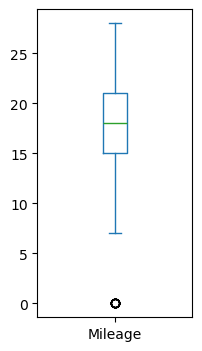

In [438]:
df_clean['Mileage'].plot.box(figsize=(2,4))

Notiamo che abbiamo dei valori molto vicini a zero, auto che hanno un alta efficienza esistono, ma valori così bassi sono impossibili. Scegliamo 3 kmpl come soglia.

In [439]:
soglia = 3
print(f"Valori per mileage inaccettabili: {len(df_clean[df_clean['Mileage'] < soglia])}")

Valori per mileage inaccettabili: 11


Queste righe sono i valori inaccettabili, sono outliers. Imputare dei valori a queste osservazioni è molto difficile a causa della dipendenza di Mileage da altre caratteristiche dell'auto che non abbiamo, per questo abbiamo deciso di rimuovere queste osservazioni.

In [440]:
df_clean = df_clean[~df_clean['Mileage'] < soglia]
df_clean = df_clean.reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


**9. `Engine`**

Assume come valore la cilindrata in CC (centimetri-cubi) del motore dell'auto.

> Contiene una **stringa** forma '\<valore\> \<unità di misura\>'

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.

*Gestione dei valori mancanti*

In [441]:
print("Valori mancanti:", df_clean['Engine'].isna().sum())


Valori mancanti: 10


Meno del 1% delle osservazioni ha un valore mancante per Engine.

Potremmo imputare il valore inserendo al media dei valori (più robusta agli outlier), ma essendo che il dataset contiene sia auto di lusso e sia auto economiche rischieremmo di inserire un valore non valido per il tipo di auto e quindi di creare degli outlier. 

Per questo motivo abbiamo deciso di eliminare le osservazioni che presentano dei valori mancanti.

In [442]:
df_clean = df_clean[~df_clean['Engine'].isna()].reset_index(drop=True)

print("Righe rimosse.")


Righe rimosse.


*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [443]:
df_engine = df_clean['Engine']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_engine.astype(str).str.match(pattern)

total_obs = len(df_engine)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
engine_units = df_engine.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
engine_units.unique()

Conformi: 1203
Non conformi: 0

---- Unità di misura presenti ----


array(['CC'], dtype=object)

Perfetto sono tutte conformi, adesso possiamo procedere con l'estrarre il valore numerico:

In [444]:
df_clean['Engine'] = df_clean['Engine'].str.split(' ').str[0]
df_clean['Engine'] = pd.to_numeric(df_clean['Engine'], errors='coerce')

df_clean['Engine'] = df_clean['Engine'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

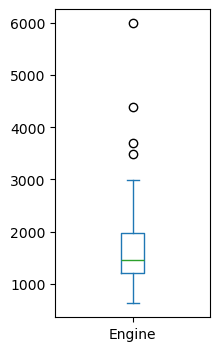

In [445]:
df_clean['Engine'].plot.box(figsize=(2,4))

In Engine non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così.

**10. `Power`**

Contiene la potenza dell'auto espressa in bhp.

> Contiene una **stringa** forma '\<valore\> \<unità di misura\>'

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.

*Gestione dei valori mancanti*


In [446]:
print(f"Valori mancanti: {df_clean['Power'].isna().sum()}")

Valori mancanti: 0


Notiamo che non ha valori mancanti, mentre prima abbiamo visto che li aveva, molto probabilmente perché queste osservazioni coincidono con quelle eliminate in precedenza

*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [447]:
df_power = df_clean['Power']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_power.astype(str).str.match(pattern)

total_obs = len(df_power)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
power_units = df_power.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
power_units.unique()

Conformi: 1203
Non conformi: 0

---- Unità di misura presenti ----


array(['bhp'], dtype=object)

In [448]:
pattern_numerico = r'.*\d+.*'

# 1. Identifica le stringhe che NON contengono un numero
# Il .astype(str) è importante per catturare tutti i tipi di stringa
non_numeriche_mask = ~df_clean['Power'].astype(str).str.contains(pattern_numerico, na=False)

# 2. Converti le stringhe non numeriche identificate in NaN
df_clean.loc[non_numeriche_mask, 'Power'] = np.nan

print(f"Smascherati {non_numeriche_mask.sum()} valori senza numeri come NaN.")

Smascherati 19 valori senza numeri come NaN.


In [449]:
df_clean = df_clean[~df_clean['Power'].isna()].reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


Perfetto sono tutte conformi, adesso possiamo procedere con l'estrarre il valore numerico:

In [450]:
df_clean['Power'] = df_clean['Power'].str.split(' ').str[0]
df_clean['Power'] = pd.to_numeric(df_clean['Power'], errors='coerce')

df_clean['Power'] = df_clean['Power'].astype('float64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

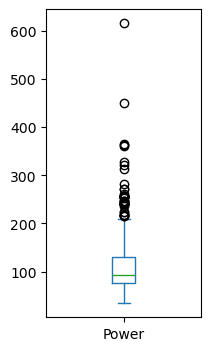

In [451]:
df_clean['Power'].plot.box(figsize=(2,4))

In Power non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così. Stesso discorso che valeva anche per Engine. Infatti vedremo più avanti che queste due variabili sono altamente correlate.

**11. `Seats`**

Contiene il numero di passeggeri che può ospitare l'auto.

> Contiene un valore discreto.

*Gestione valori mancanti*

In [452]:
print(f"Valori mancanti: {df_clean['Power'].isna().sum()}")

Valori mancanti: 0


Mancano alcuni valori, vediamo quali valori assume questa variaibile. Ci aspetteremmo una predominanza di auto a 5 posti, che sono le più diffuse.

In [453]:
df_clean['Seats'].value_counts()

Seats
5.0     999
7.0     122
8.0      36
4.0      15
6.0       7
10.0      2
2.0       2
Name: count, dtype: int64

Visto che il valore che esce più spesso è 5, e dato che vogliamo tenere più dati possibili, abbiamo deciso di fare una cosa semplice: sostituire i valori mancanti nella colonna dei posti con un bel '5'.

Così facciamo un piccolo "errore" statistico, perché stiamo gonfiando un po' la categoria da 5 posti. Però è un ottimo compromesso tra l'essere precisi e l'avere un dataset completo.

Dato che i dati mancanti sono davvero pochi (solo il 2%!), questo piccolo trucchetto non rovinerà l'analisi generale né influenzerà seriamente il modello finale.

Procediamo all'imputazione:

In [454]:
df_clean['Seats'] = df_clean['Seats'].fillna(5)

print("Valori imputati.")

Valori imputati.


*Gestione degli outlier*

Mostriamo il boxplot:

<Axes: >

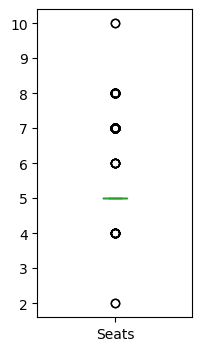

In [455]:
df_clean['Seats'].plot.box(figsize=(2,4))

Abbiamo visto prima che più del 90% del dataset ha 5 posti. Probabilmente anche per questo motivo viene considerato outlier qualsiasi numero non sia 5. Lasciamo tutto così, dato che è tutto perfettamente plausibile.

Tuttavia notiamo che c'è un auto con zero posti, impossibile:

In [456]:
df_clean[df_clean['Seats'] < 1]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


Abbiamo deciso di imputargli la moda della variabile '5':

In [457]:
df_clean.loc[df_clean['Seats'] < 1, 'Seats'] = 5

print("Valori imputati.")

Valori imputati.


**12. `New Price`**

Questa variabile contiene il valore del prezzo del nuovo modello di quell'auto, espresso in Lakh.

> Contiene un valore continuo.

*Gestione dei valori mancanti*

In [458]:
print(f"Valori mancanti: {df_clean['New_Price'].isna().sum()}")

Valori mancanti: 1003


Questa colonna ha quasi tutti i valori mancanti. La sua gestione è molto problematica perché un imputazione risulta difficile perché non abbiamo abbastanza informazioni.

Quindi abbiamo deciso di rumuoverla per una questione di pulizia del dataset.

In [459]:
df_clean.drop('New_Price', axis=1, inplace=True)

print("Colonna rimossa.")

Colonna rimossa.


**13. `Price`**

Questa variabile contiene il prezzo con cui è stata venduta l'auto.

> Contiene un valore continuo.

Come visto prima questa variabile non ha alcun valore mancante.

Non c'è alcun controllo di formattazione o inconsistenza da fare per questa variabile. Essa è già pulita.

*Gestione degli outliers*

Vediamo il boxplot:

In [460]:
df_clean['Price'].plot.box(figsize=(2,4))

KeyError: 'Price'

Innanzitutto notiamo una distribuzione altamente asimmetrica, per la precisione right-skewed (se plottassimo la distribuzione). In futuro converrebbe fare una trasformazione logaritmica per portare la sua ditribuzione ad assomigliare a quella normale (Gaussiana), per migliorare le performance del notro modello.

Vediamo che presenta molti valori alti, potrebbero riferirsi ad auto molto costose come auto di lusso, ma vediamo meglio:

In [ ]:
df_clean[df_clean['Price'] > 100]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3887,Land,Rover,Hyderabad,2,25000.0,Diesel,Automatic,First,13,2993,255.0,5.0,160.0
5523,Lamborghini,Gallardo,Delhi,8,6500.0,Petrol,Automatic,Third,6,5204,560.0,2.0,120.0


Infatti stimo parlando di auto di lusso, che sono molto costose. Non si trattano di outliers, non sono errori di prezzo. Tuttavia essendo che la nostra analisi include anche questo tipo di auto, abbiamo deciso di non rimuovere queste osservazioni.

Facciamo un controllo mirato per valori impossibili:

In [ ]:
df_clean[df_clean['Price'] < 0.5]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1635,Tata,Nano,Pune,8,65000.0,Petrol,Manual,Second,26,624,35.0,4.0,0.44
2710,Hyundai,Getz,Pune,14,86000.0,Petrol,Manual,Second,15,1341,83.0,5.0,0.45


Non abbiamo alcun valore zero (sarebbero senza dubbio outlier), ma queste auto non sono outlier.

> Abbiamo finito il nostro processo di Data Cleaning & Preparation, ne risulta un dataset più pulito e pronto per un analisi più approfondita.

---

## Analisi Esplorativa

Questa parte si concentra su uno studio più approfondito delle caratteristiche delle nostre osservazioni e sulle loro possibili correlazioni.

Si divide in due parti:
- **Analisi Univariata**, in cui calcoleremo le varie statistiche sommarie per una variabile alla volta
- **Analisi Multivariata**, in cui andremo ad esplorare le varie correlazioni provando a spiegare eventuali scoperte

### Analisi Univariata

Come detto prima ci concentreremo su una variabile alla volta, seguendo un po' lo schema utilizzato per la parte precedente.

**1. `Brand` e `Model`**

Trattiamo queste due variabili in un'unica sezione a causa della loro correlazione intrinseca (le abbiamo precedentemente estratte dalla stessa variabile `Name`).

Vediamo quanti differenti Brand abbiamo:

In [ ]:
print(f"Numero di Brand: {len(df_clean['Brand'].unique())}")

Numero di Brand: 29


Andiamoli a visualizzare:

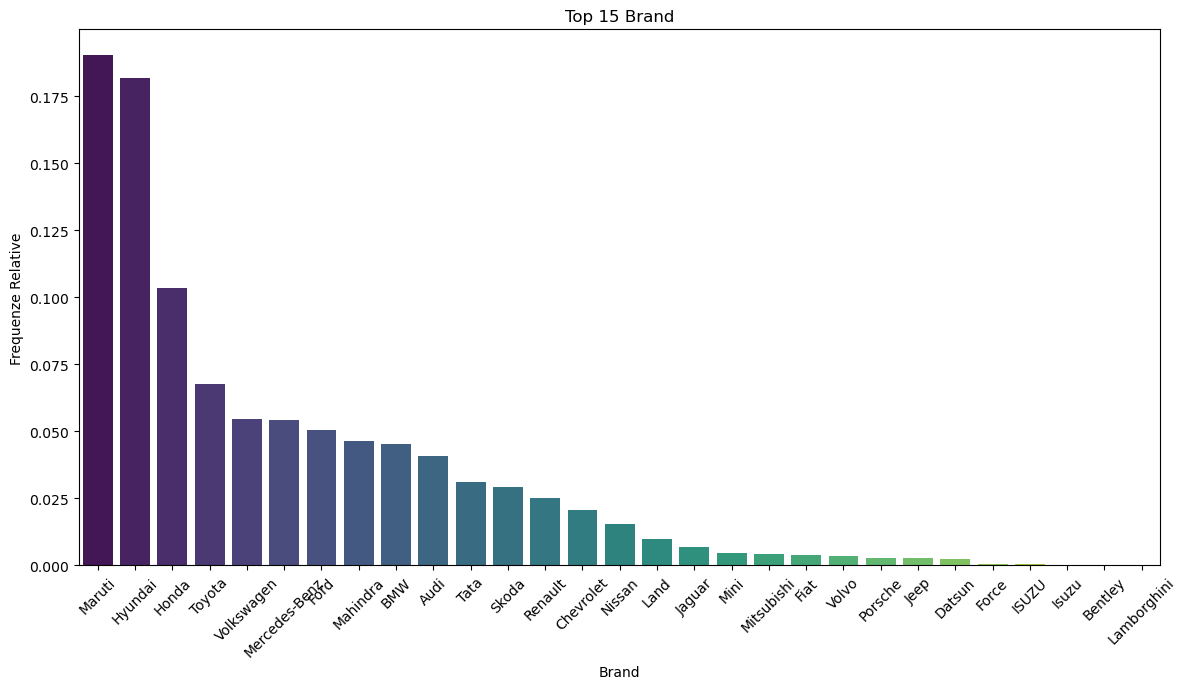

In [ ]:
import seaborn as sns

brands = df_clean['Brand'].value_counts(normalize=True)

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=brands.index, y=brands.values, hue=brands.index, palette='viridis', legend=False)

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

plt.title('Top 15 Brand')
plt.xticks(rotation=45)
plt.ylabel('Frequenze Relative')

plt.tight_layout()
plt.show()

Vediamo come il dataset è dominato da un certo numero di brand, alcuni coprono oltre il 10%, altri nemmeno lo 0.01%. Andiamo a visualizzare i top 10 brand.

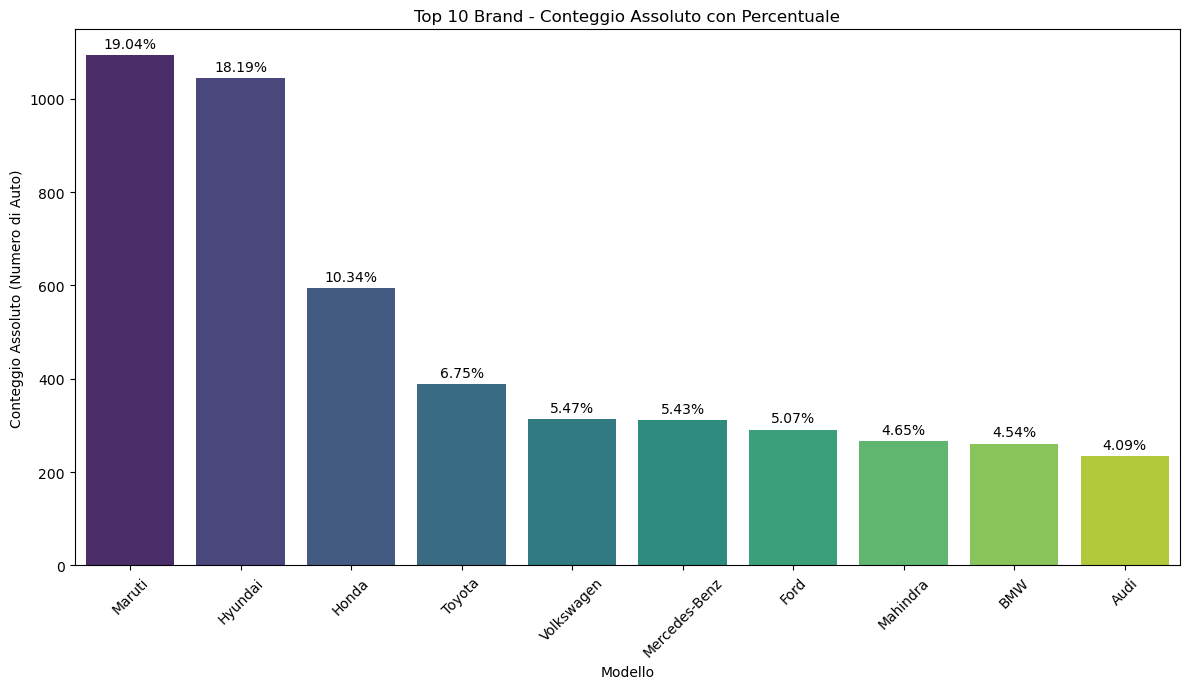

In [ ]:
count_assoluto = df_clean['Brand'].value_counts().head(10)

count_relativo = (df_clean['Brand'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Top 10 Brand - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=45)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

Possiamo già concludere che il dataset è predominato da automobili utilitarie e non molto costose (Muruti, Hyndai, Honda, Toyota, etc...), la top 5 copre circa il 60% del dataset.

Il rischio per questa variabile è che se volessimo utilizzare `Brand` per un modello, essendoci troppi valori unici, rischiamo di imbatterci in un overplotting, in cui il modello impara il training-set e non generaizza al meglio.

Tuttavia rimuovere questa variabile sarebbe una soluzione drastica. Potremmo creare una nuova caratteristica `Price_Class`, che in base ad altre variabili come il prezzo e la cilindrata del motore, assegni ad ogni osservazione un etichetta su 4-5 (es. 'di-lusso', 'economica').

Per il momento la manterremo così ed andremo avanti con l'analisi.

Per quanto riguarda `Model` vale lo stesso discorso fatto per 'Brand' ma amplificato. Ogni brand ha tantissimi modelli che raramente si discostano dalla maggior parte di tipo di auto che la casa automobilistica produce. In futuro potremmo essere costretti a rimuovere la variabile Model.

Inoltre Model dipende molto da Brand, potremmo dire che non può esistere senza di esso, quindi si potrebbe anche rumuovere.

Analizziamo i modelli:

In [ ]:
num_of_models = len(df_clean['Model'].unique())
print(f"Numero di Model: {num_of_models}")

Numero di Model: 200


Abbiamo 205 diversi modelli nel nostro dataset.

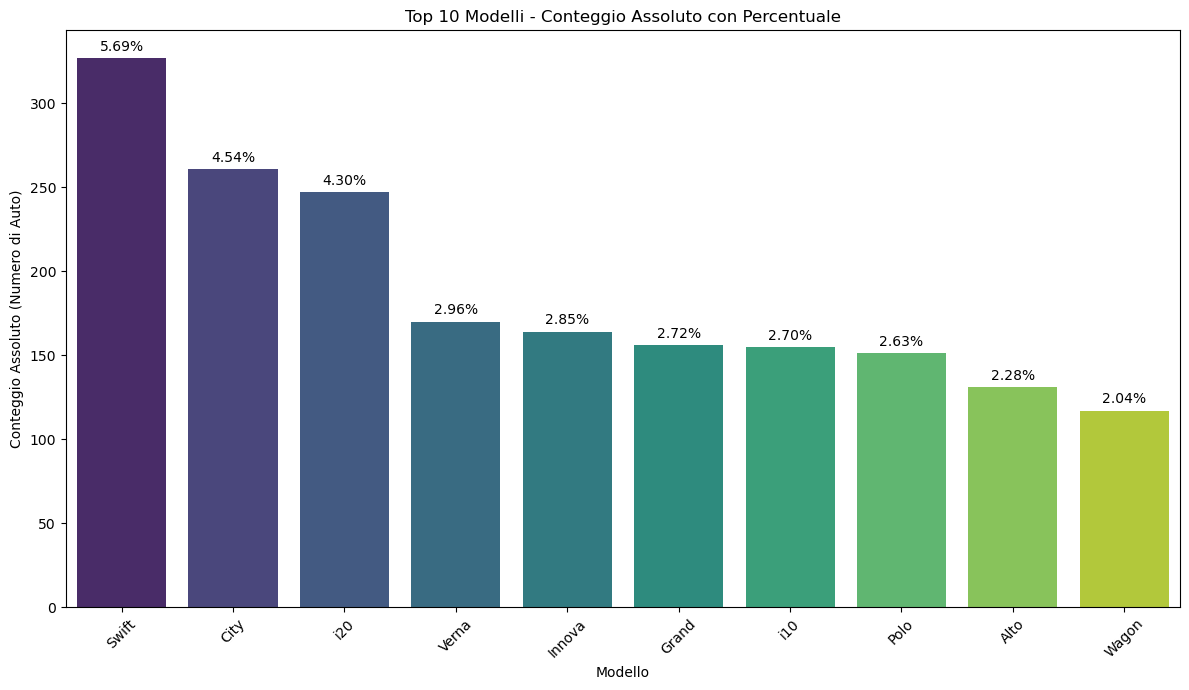

In [ ]:
count_assoluto = df_clean['Model'].value_counts().head(10)

count_relativo = (df_clean['Model'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Top 10 Modelli - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=45)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

I top 10 brand non arrivano a comporre il 30% del dataset, e sappiamo che abbiamo più d 200 valori unici. Questa variabile è troppo rumorosa.

**2. `Location`**

Visiaulizziamo il numero di osservazioni per Location:

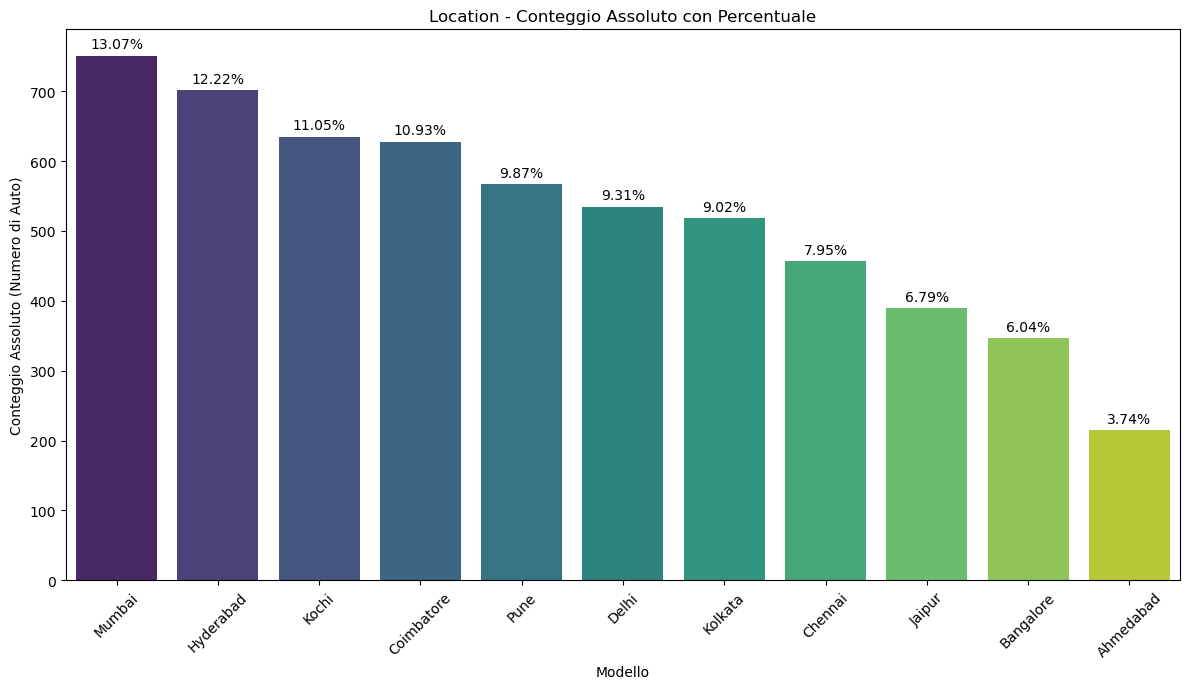

In [ ]:
count_assoluto = df_clean['Location'].value_counts()

count_relativo = (df_clean['Location'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Location - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=45)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

Notiamo che non c'è nessun luogo troppo predominante,  è tutto molto equilibrato.

**3. `Age`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [ ]:
col = df_clean['Age']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5745.000000
mean        5.406092
std         2.969072
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: Age, dtype: float64

mode:  0    5
Name: Age, dtype: int64

Skewness: 0.54
Kurtosis: -0.15


Notiamo varie cose:
- il **50% dei valori** ha tra i 3-7 anni
- **media**: 5.4, **mediana**: 5. Vuol dire che abbiamo dei valori che 'spingono' la media verso destra
- dalla **skewness** (asimmetria) notiamo che è assimetrica verso destra, come notato prima
- **kurtosis** ci indica che ha il picco un po' più schiacciato rispetto alla normale (gaussiana)

Vediamo la sua distribuzione:

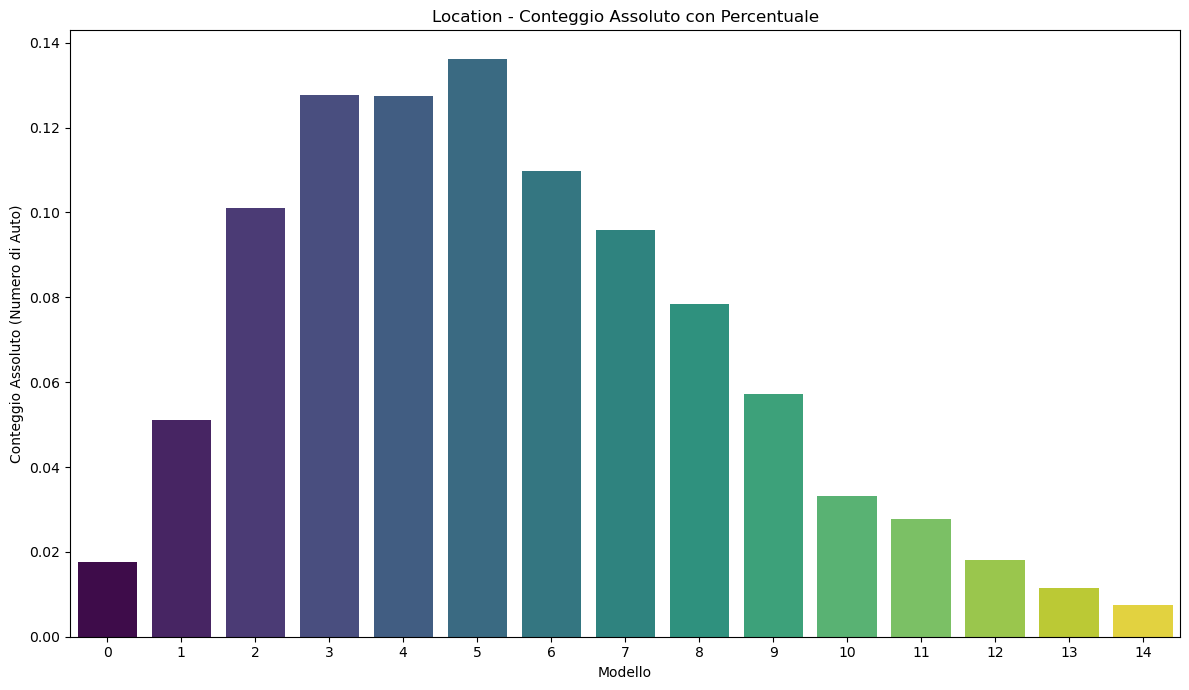

In [ ]:
count = df_clean['Age'].value_counts(normalize=True)

plt.figure(figsize=(12, 7))

sns.barplot(x=count.index, y=count.values, hue=count.index, palette='viridis', legend=False)

plt.title('Location - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=0)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

Tende ad una distribuzione normale, ci piace.

**4. Kilometers_Driven**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [ ]:
col = df_clean['Kilometers_Driven']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count      5745.000000
mean      56090.424891
std       32062.729644
min         171.000000
25%       33000.000000
50%       52000.000000
75%       72000.000000
max      170000.000000
Name: Kilometers_Driven, dtype: float64

mode:  0    60000.0
Name: Kilometers_Driven, dtype: float64

Skewness: 1.04
Kurtosis: 1.53


Notiamo varie cose:
- il **50% dei valori** si trova tra 33-72 mila km
- **media**: 56 mila km, **mediana**: 54 mila km. Vuol dire che abbiamo dei valori che 'spingono' la media verso destra, ma non si discosta di così tanto
- dalla **skewness** (asimmetria) notiamo che è assimetrica verso destra, come notato prima
- **kurtosis** ci indica che ha un picco' più alto rispetto alla normale (gaussiana)

Andiamo a vedere la sua distribuzione:

Num. of bins: 35


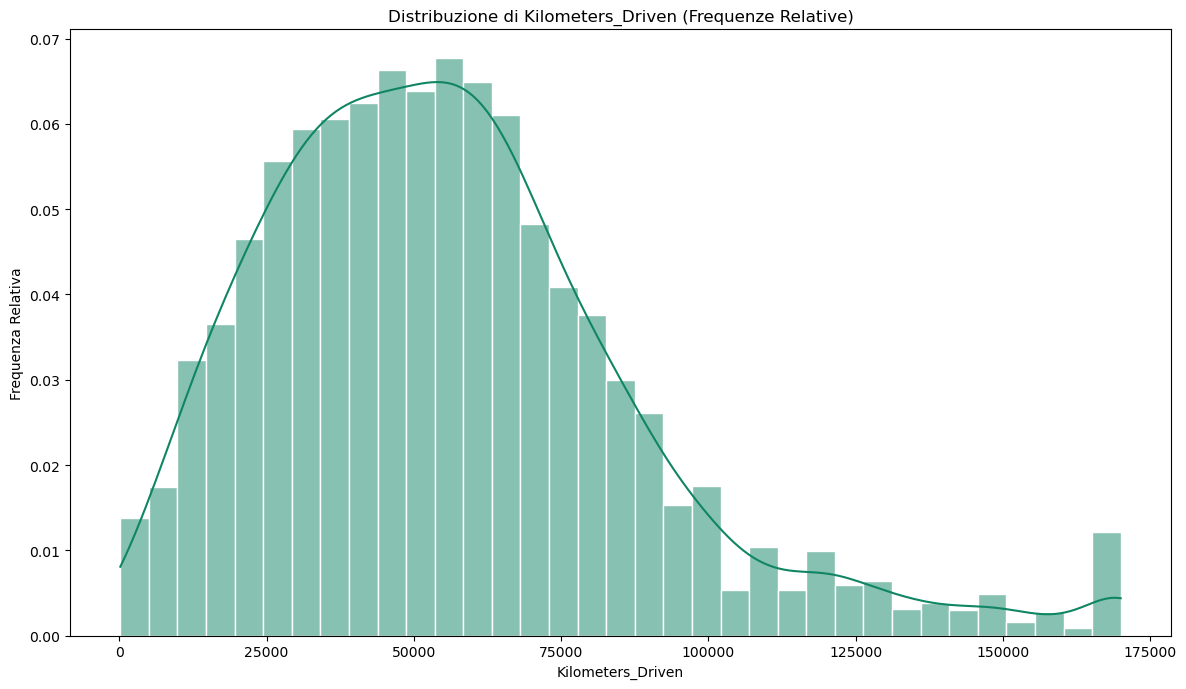

In [ ]:
col = df_clean['Kilometers_Driven']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Kilometers_Driven (Frequenze Relative)')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Kilometers_Driven')

plt.tight_layout()
plt.show()

Potremmo dire che pure questa variabile tende ad una normale.

**5. Fuel_Type**

Ricordiamo che Fuel_Type conteneva 5 tipi di etichette
- Diesel
- Petrol
- CNG
- LPG
- Electric

Le utlime tre componevano <1% del dataset, perciò avevamo deciso di ruomere quelle osservazioni.

Andremo quindi a mostrare uno stacked bar plot per mostrare le frequenze di questa variabile:

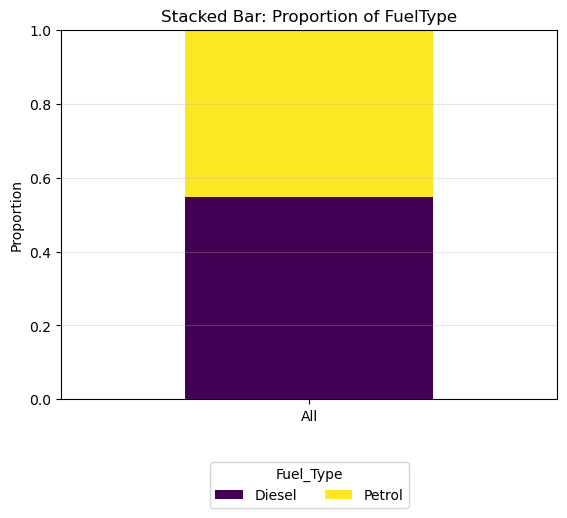

In [ ]:
fuel_props = df_clean.groupby(lambda _: 'All')['Fuel_Type'].value_counts(normalize=True).unstack()

# Plot as stacked bar
fuel_props.plot(kind='bar', stacked=True, colormap='viridis')

# Customize plot
plt.title('Stacked Bar: Proportion of FuelType')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Fuel_Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis='y', alpha=0.3)

plt.show()

Notiamo che le proporzioni sono equilibrate, con una piccola predomiananza di auto a Diesel.

**6. `Transmission`**

Vediamo la sua distribuzione:

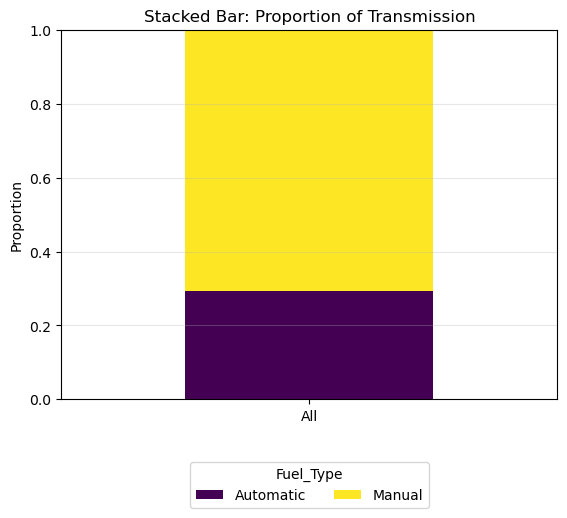

In [ ]:
trans_props = df_clean.groupby(lambda _: 'All')['Transmission'].value_counts(normalize=True).unstack()

# Plot as stacked bar
trans_props.plot(kind='bar', stacked=True, colormap='viridis')

# Customize plot
plt.title('Stacked Bar: Proportion of Transmission')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Fuel_Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis='y', alpha=0.3)

plt.show()

C'è una predominanza di auto Manuali.

**7. `Owner_Type`**

Vediamo la sua distribuzione:

Distribuzione Owner Type:
      Proprietari  Frequenza  Percentuale (%)
0           First       4766        82.959095
1          Second        886        15.422106
2           Third         86         1.496954
3  Fourth & Above          7         0.121845
------------------------------


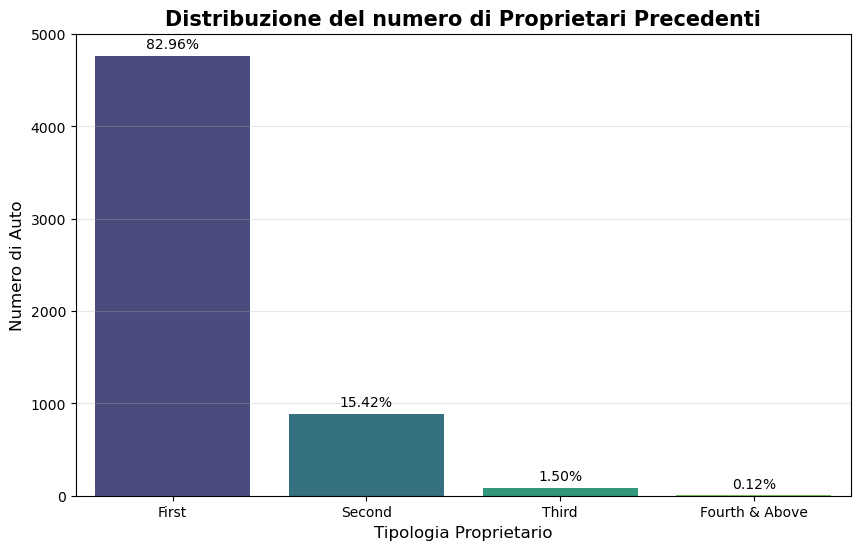

In [ ]:
owner_counts = df_clean['Owner_Type'].value_counts().reset_index()
owner_counts.columns = ['Proprietari', 'Frequenza']
owner_counts['Percentuale (%)'] = (owner_counts['Frequenza'] / len(df_clean)) * 100

print("Distribuzione Owner Type:")
print(owner_counts)
print("-" * 30)

plt.figure(figsize=(10, 6))

order = owner_counts['Proprietari'] 

ax = sns.barplot(
    x='Proprietari', 
    y='Frequenza', 
    hue='Proprietari',
    data=owner_counts, 
    order=order,
    palette='viridis',
    legend=False
)

for i, container in enumerate(ax.containers):
    percentuale = owner_counts['Percentuale (%)'].iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)


plt.title('Distribuzione del numero di Proprietari Precedenti', fontsize=15, fontweight='bold')
plt.xlabel('Tipologia Proprietario', fontsize=12)
plt.ylabel('Numero di Auto', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.show()

La distribuzione è fortemente dominata dalla categoria *'First Owner'*, che copre circa l'83% dei casi. Quindi il dataset è composto prevalentemente da veicoli 'giovani' e ben mantenuti.

Notiamo un calo passando da *'Second'* a *'Third*' hand. Le auto con 3 o più propreitari sono statisticamente trascurabili.

Nota: Essendo una variabile ordinale, in fase di modeling potremmo assegnare dei valori numerici ad ogni etichetta. Inoltre potremmo combinare in una sola etichetta '*Third*' e '*Fourth & Above*', essenco che sono entrambe statisticamente trascurabili.

**8. `Mileage`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [ ]:
col = df_clean['Mileage']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5745.000000
mean       17.806266
std         4.310167
min         0.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        28.000000
Name: Mileage, dtype: float64

mode:  0    18
Name: Mileage, dtype: int64

Skewness: -0.19
Kurtosis: 0.61


Conclusione 1 (Dispersione): 
- La deviazione standard di 3.79 (che è circa il 25% della media) indica che il campione è eterogeneo. La performance di un'auto tipica si discosta dalla media per circa 3.8 km/kg.

Conclusione 2 (Asimmetria): 
- Poiché la Media (14.77) > Mediana (13.99), la distribuzione è asimmetrica verso destra. Ciò significa che ci sono relativamente poche auto che hanno un consumo molto più alto della media (sono le auto molto efficienti).

Il valore di skewness ci suggerisce infatti un'assimmetria a destra. Inoltre il valore di kurtosis ci indica che abbiamo un picco più appuntito e code più pesanti rispetto alla normale.


Num. of bins: 35


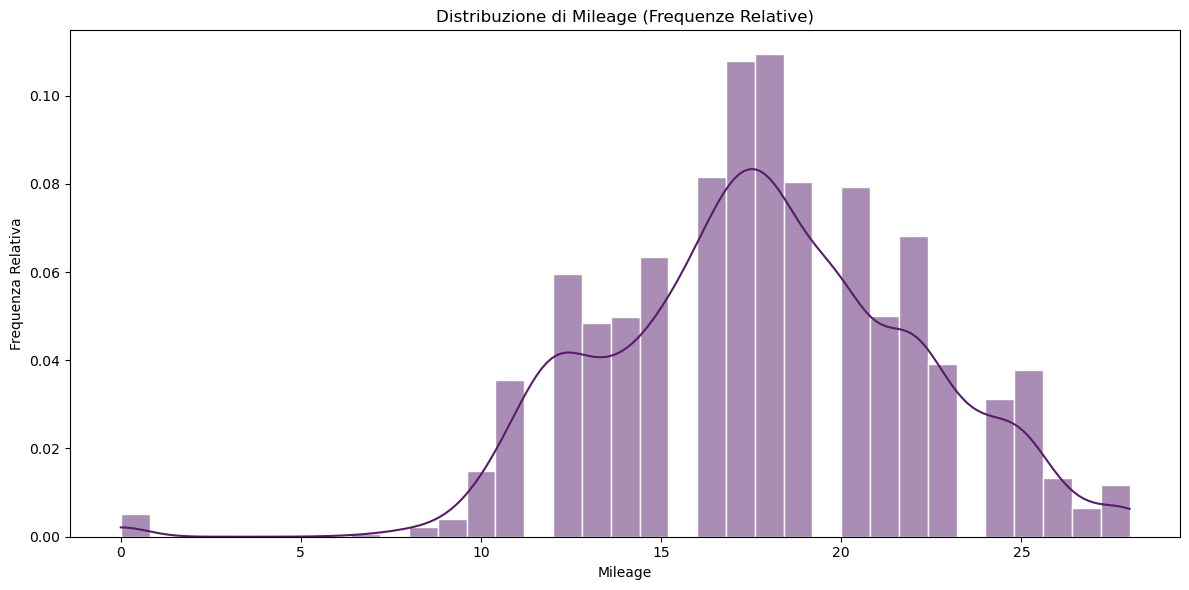

In [ ]:
col = df_clean['Mileage']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Mileage (Frequenze Relative)')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Mileage')

plt.tight_layout()
plt.show()

Come ci si aspettava notiamo un'assimmetria verso destra. Inoltre la moda sembra essere circa 13 km/kg, più del 12% delle auto hanno quel consumo. 

La distribuzione non segue la normale perfettamente.

**9. `Engine`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [ ]:
col = df_clean['Engine']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5745.000000
mean     1633.355962
std       601.349477
min       624.000000
25%      1198.000000
50%      1497.000000
75%      1991.000000
max      5998.000000
Name: Engine, dtype: float64

mode:  0    1197
Name: Engine, dtype: int64

Skewness: 1.42
Kurtosis: 3.14


Innanzitutto il 50% dei motori ha tra 1200 e 1984 CC di cilindrata. C'è molta varianza nei dati, essendo che la media è più grande della mediana ma non di molto significa che abbiamo alcuni valori maggiori. Ma abbiamo anche valori molto grandi, probabilmente auto sportive che hanno motori più potenti.

La Skewness ci indica che c'è una significativa asimmetria verso destra, potrebbe indicare che la maggior parte delle vendite riguardano auto economiche, utilitarie quindi con bassi CC; mentre Kurtosis ci mostra che la distribuzione è più appuntita rispetto la normale.

Num. of bins: 35


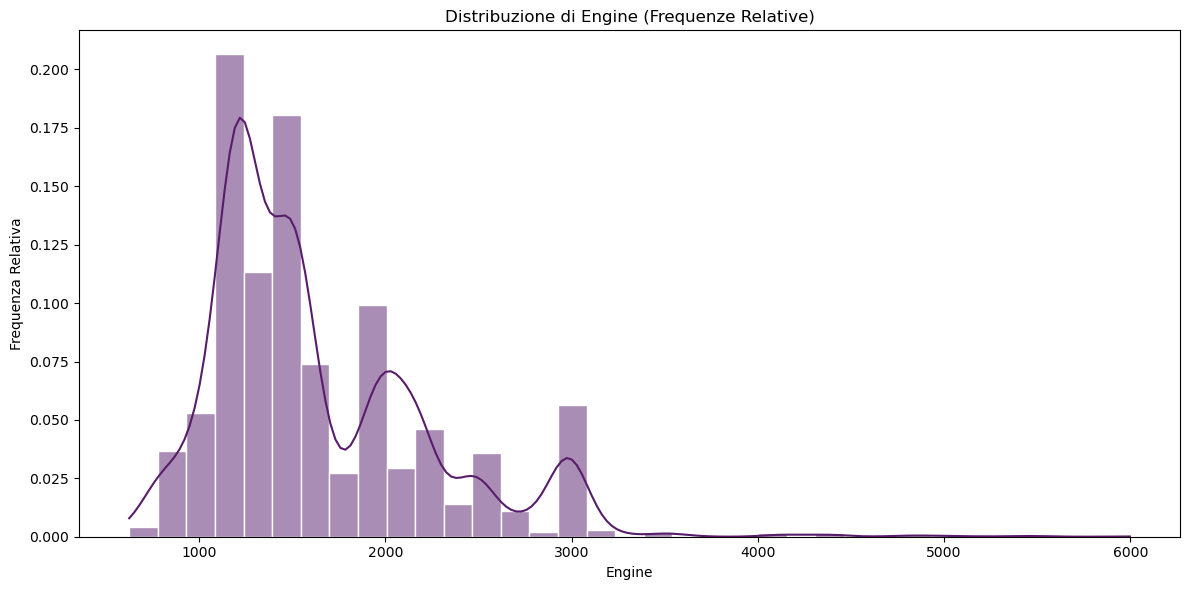

In [ ]:
col = df_clean['Engine']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Engine (Frequenze Relative)')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Engine')

plt.tight_layout()
plt.show()

I dati non sono distribuiti benissimo secondo la normale. Notiamo che abbiamo pochissime auto che superano i 3000 di cilindrata, auesto perché in genere motori più potenti sono montati su auto più costose che hanno meno mercato, inoltre la moda è di circa 1300 CC.

In più la distribuzione è molto estesa verso destra, come visto prima c'è una certa varianza nei valori.

**10. `Power`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [ ]:
col = df_clean['Power']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5745.000000
mean      114.143198
std        53.900347
min        34.200000
25%        78.900000
50%        98.600000
75%       140.000000
max       560.000000
Name: Power, dtype: float64

mode:  0    74.0
Name: Power, dtype: float64

Skewness: 1.92
Kurtosis: 6.54


Notiamo che il 50% delle osservazioni ha tra i 78 e i 138 cavalli, ma il massimo di discosta di molto, sempre per gli stessi motivi elencati per Engine, infatti la potenza dell'auto e la cilindrata del motore sono due caratteristiche molto correlate.

Ci aspettiamo che Power abbia una distribuzione simile a Engine.

Num. of bins: 35


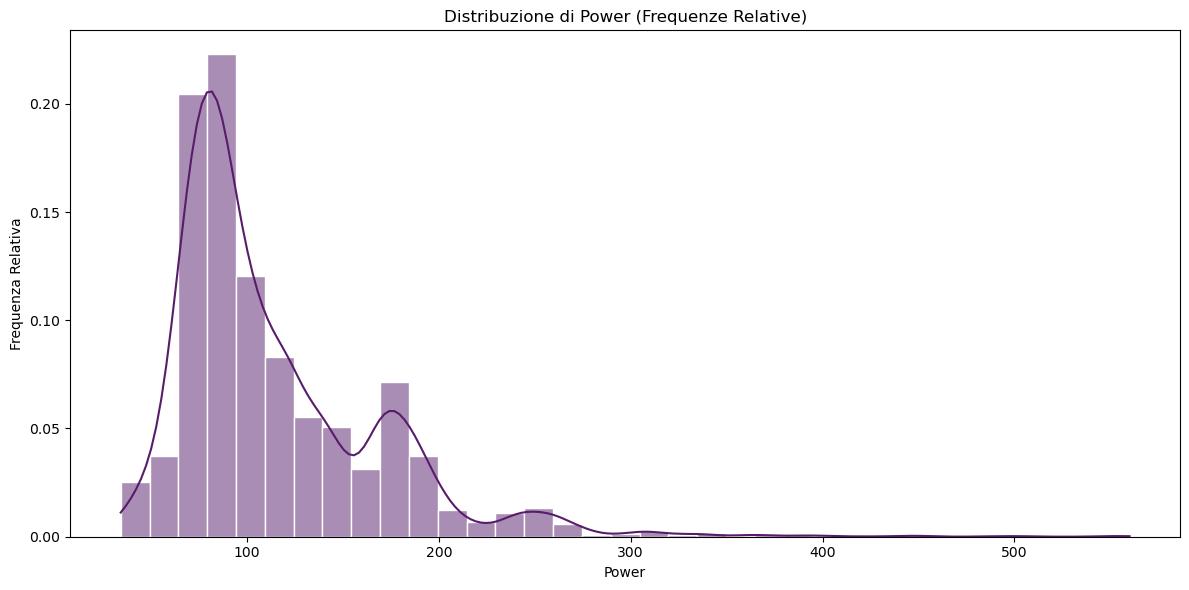

In [ ]:
col = df_clean['Power']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Power (Frequenze Relative)')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Power')

plt.tight_layout()
plt.show()

Come detto prima, ha un distribuzione molto simile a quella di Power. La moda è circa 95 cavalli con quasi 30% delle osservazioni.
Vediamo sempre una distribuzione fortemente asimmetrica verso destra.

Inoltre Power si discosta ancora di più dalla normale. Anche se i cavalli sono determinati dalla cilindrata ci sono anche altri fattori che influenzano tale dato, ad esempio la qualità di costruzione del motore o quanto efficientemente viene gestito il carburante.

**11. `Seats`**

Vediamo la sua distribuzione:

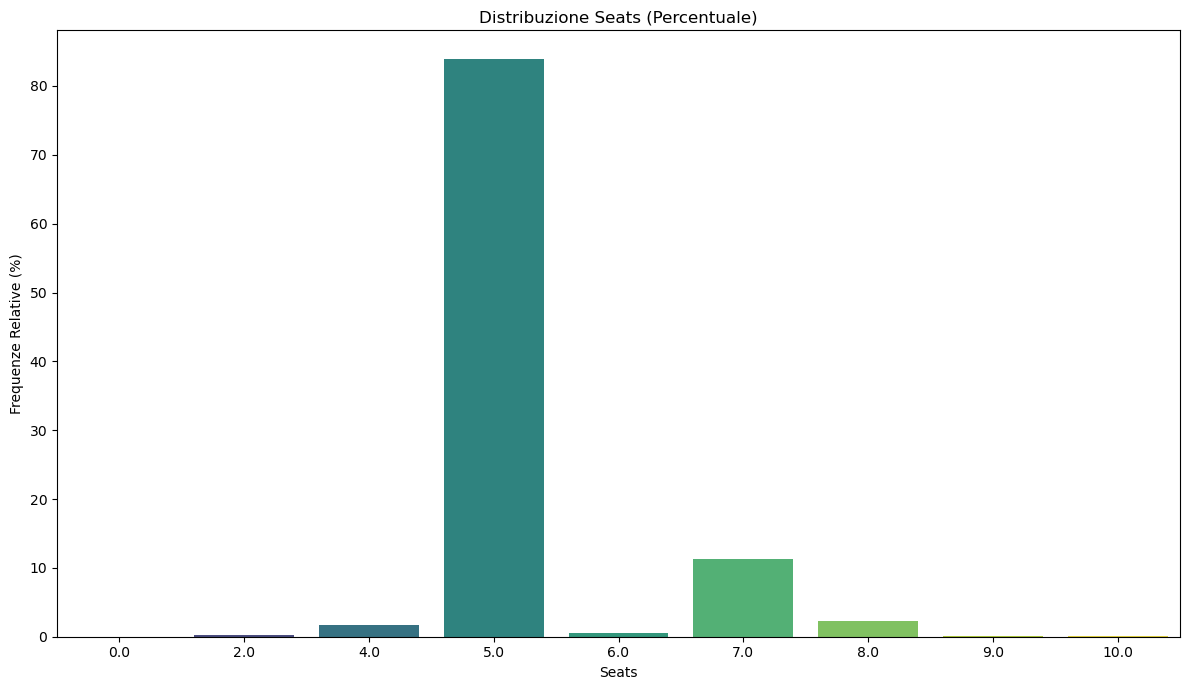

In [ ]:
seats = df['Seats']

seats_abs = seats.value_counts().sort_index()
seats_rel = (seats.value_counts(normalize=True).sort_index()) * 100

plt.figure(figsize=(12, 7))


ax2 = sns.barplot(
    x=seats_rel.index, 
    y=seats_rel.values, 
    hue=seats_rel.index, 
    palette='viridis', 
    legend=False
)

plt.title('Distribuzione Seats (Percentuale)')
plt.xticks(rotation=0)
plt.ylabel('Frequenze Relative (%)')
plt.xlabel('Seats')

plt.tight_layout()
plt.show()


Notiamo come il mercato è fortemente dominato da auto a 5 posti, le più diffure. Con un fetta non trascurabile di auto a 7 posti, suv o auto familiari probabilmente. Auto a 10 e 9 posti sono statisticamente trascurabili.

**12. `Price`**

Ricordiamo che il prezzo è espresso in Lahks, in cui 1 unità di Lahks equivale a 100.000. Quindi questi pressi devono essere moltiplicati x100.000. È comunemente usata per indicare cifre in Rupie indiane (INR) o pakistane (PKR). Ad esempio, "5 Lahks di Rupie" significa 500.000 Rupie.

In [ ]:
col = df_clean['Price']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5745.000000
mean        9.749464
std        11.297604
min         0.440000
25%         3.650000
50%         5.800000
75%        10.400000
max       160.000000
Name: Price, dtype: float64

mode:  0    4.5
Name: Price, dtype: float64

Skewness: 3.30
Kurtosis: 16.78


Il 50% dei prezzi si trova tra i 3.5 e i 10 Lahks. La media è più alta della mediana, infatti il valore max è molto alto, indicandoci una presenza di alcuni valori di prezzo elevati. 

Il prezzo minimo è molto basso pure per un auto rivenduta: deve trattarsi di un auto in condizioni pessine, con alto chilometraggio e molto vecchia. Potrebbe essere anche essere stata venduta in una zona rurale dell'India.

Invece il prezzo massimo è molto alto, in genere si tratta di auto di lusso oo sportive.

Num. of bins: 35


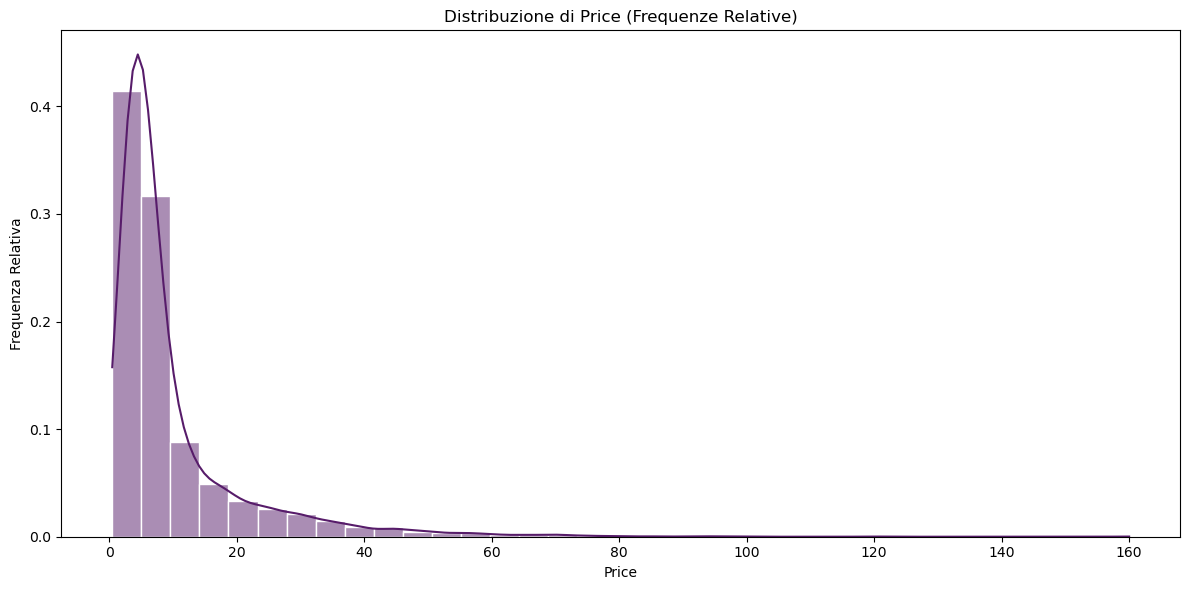

In [ ]:
col = df_clean['Price']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Price (Frequenze Relative)')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

Questa distribuzione è molto diversa dalla normale. Notiamo un alto picco e un'asimmetria molto accentuata. Deduciamo che le auto di lusso sono molto meno vendute delle utilitarie. La moda si aggira tra 0 e 5 Lahks, con oltre il 40% delle auto. 

Questa coda è causata da un gruppo di auto con prezzi molto, molto alti (auto di lusso, sportive, o veicoli specializzati).

Picco Appuntito: C'è una concentrazione eccezionale di auto vendute attorno al prezzo modale (il prezzo più frequente). Ciò significa che c'è un prezzo "target" o una fascia di prezzo in cui la maggior parte delle vendite si aggrega.

Code Ponderose (Outliers): La Kurtosis positiva estrema indica che, rispetto a una distribuzione Normale, ci sono molti più outliers (valori estremi) di quanto ci si aspetterebbe. Combinando questo con l'alta Skewness, deduciamo che la maggior parte di questi outliers si trova nell'estremità superiore, confermando che i veicoli di lusso sono non solo rari, ma hanno prezzi che si discostano in modo massiccio dalla norma.

Deduciamo che c'è un ampio mercato di massa, i veicoli economici e accessibili sono i più venduti. Mentre esiste un mercato di auto di lusso o in generale costose il cui prezzo si discosta di tantissimo rispetto la media.

### Analisi Multivariata

Andiamo a vedere la matrice di covarianza tra le varie variabili:

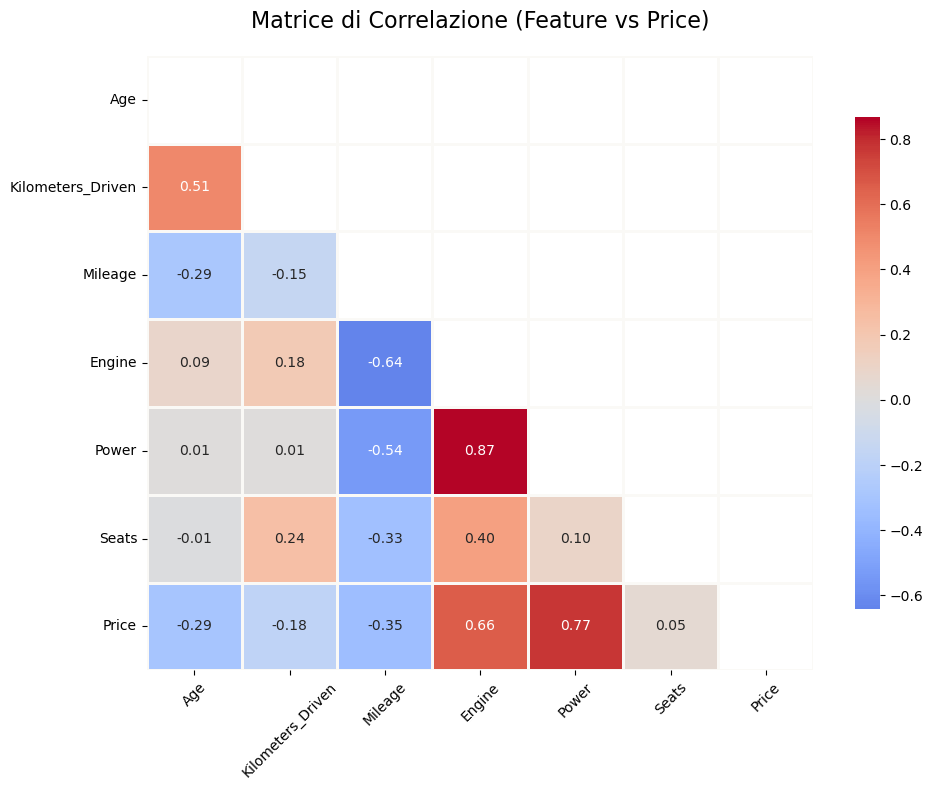

In [ ]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
corr_matrix = df_clean[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,        
            fmt=".2f",         
            cmap='coolwarm',   
            center=0,          
            linewidths=1,      
            linecolor='#FAF9F6', 
            cbar_kws={"shrink": .8})

plt.title('Matrice di Correlazione (Feature vs Price)', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

(Power 0.78, Engine 0.70): Sono correlazioni fortissime. Significa che la potenza è il miglior predittore del prezzo. Se l'auto ha tanti cavalli, costa tanto.

L'Invecchiamento (Age -0.45): Correlazione negativa solida. Ogni anno che passa, il prezzo scende. Perfetto.

(Mileage -0.33): È negativo. Significa che più l'auto è efficiente (fa tanti km con un litro), meno costa. Perché? Perché le auto che consumano poco sono le utilitarie economiche (Maruti). Le auto che consumano molto sono le Ferrari e i SUV di lusso. Quindi ha senso!

Multicollinearità (Engine vs Power = 0.86) Il quadratino rosso scuro tra Engine e Power. 0.86 è altissimo. Significa che queste due variabili dicono quasi la stessa cosa (motore grosso = tanta potenza).

Soluzione futura: Se il modello vacilla, potremmo doverne eliminare una delle due (di solito si tiene Power perché 0.78 > 0.70).

Andiamo adesso a visualizzare degli scatter plots, per vedere le distribuzioni delle varie coppie di variabili.

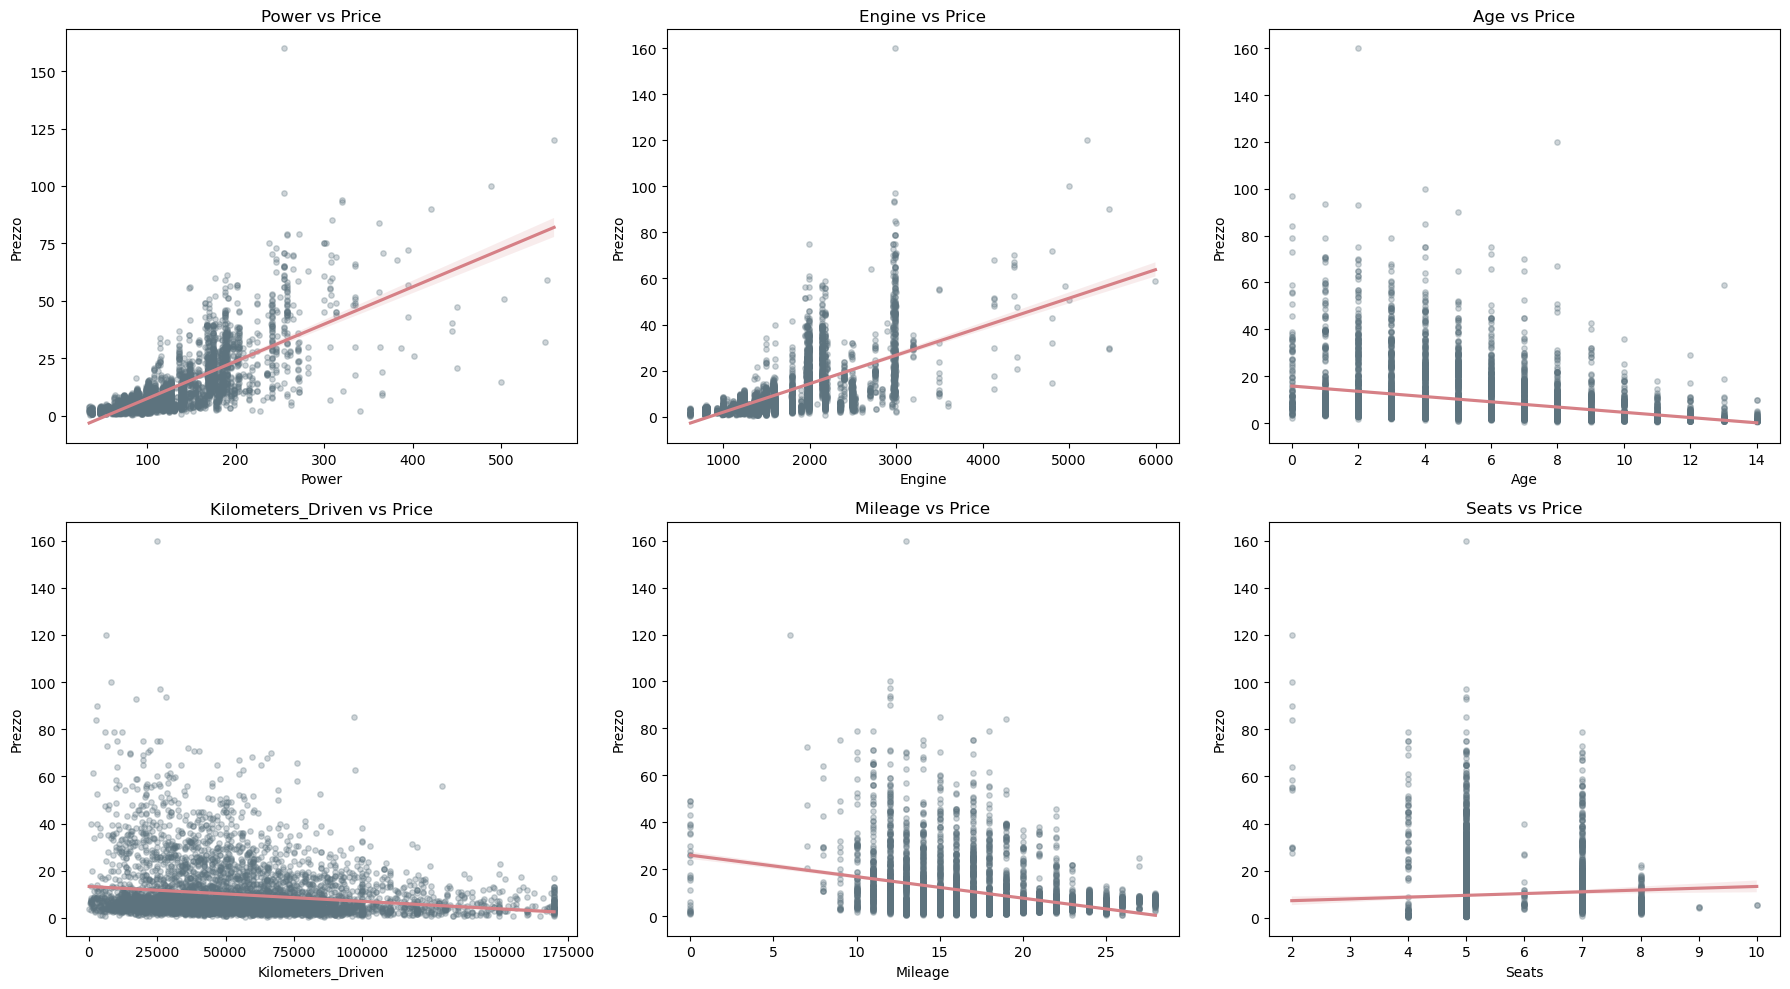

In [ ]:
vars_to_plot = ['Power', 'Engine', 'Age', 'Kilometers_Driven', 'Mileage', 'Seats'] 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(vars_to_plot):
    sns.regplot(x=col, y='Price', data=df_clean, ax=axes[i],
                scatter_kws={'color': '#5D737E', 'alpha': 0.3, 's': 15}, 
                line_kws={'color': '#D68086'}) 
    
    axes[i].set_title(f'{col} vs Price', fontsize=12)
    axes[i].set_ylabel('Prezzo')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Dobbiamo indagare meglio su queste correlazioni.

Andiamo a vedere come cambia Price in relazione alle varie variabili:

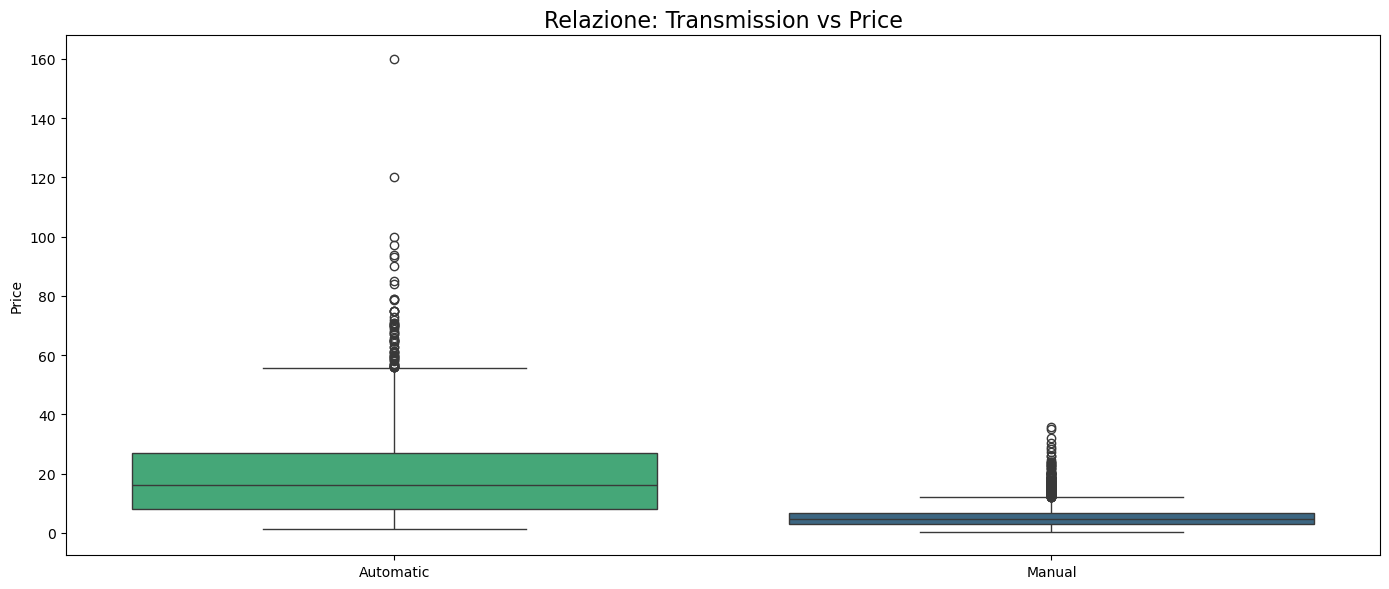

Statistiche per TRANSMISSION:
              count   mean  median    std
Transmission                             
Automatic      1693  19.96   16.11  15.99
Manual         4052   5.48    4.75   3.52


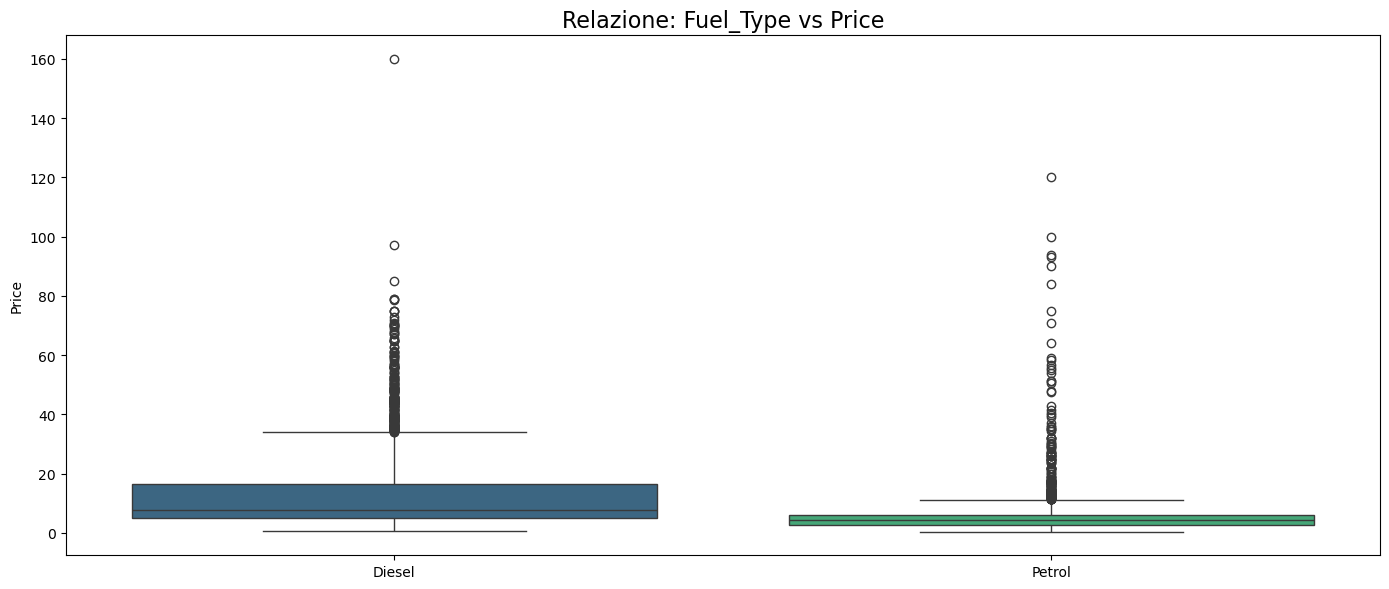

Statistiche per FUEL_TYPE:
           count   mean  median    std
Fuel_Type                             
Diesel      3140  12.98    7.88  12.84
Petrol      2605   5.86    4.25   7.42


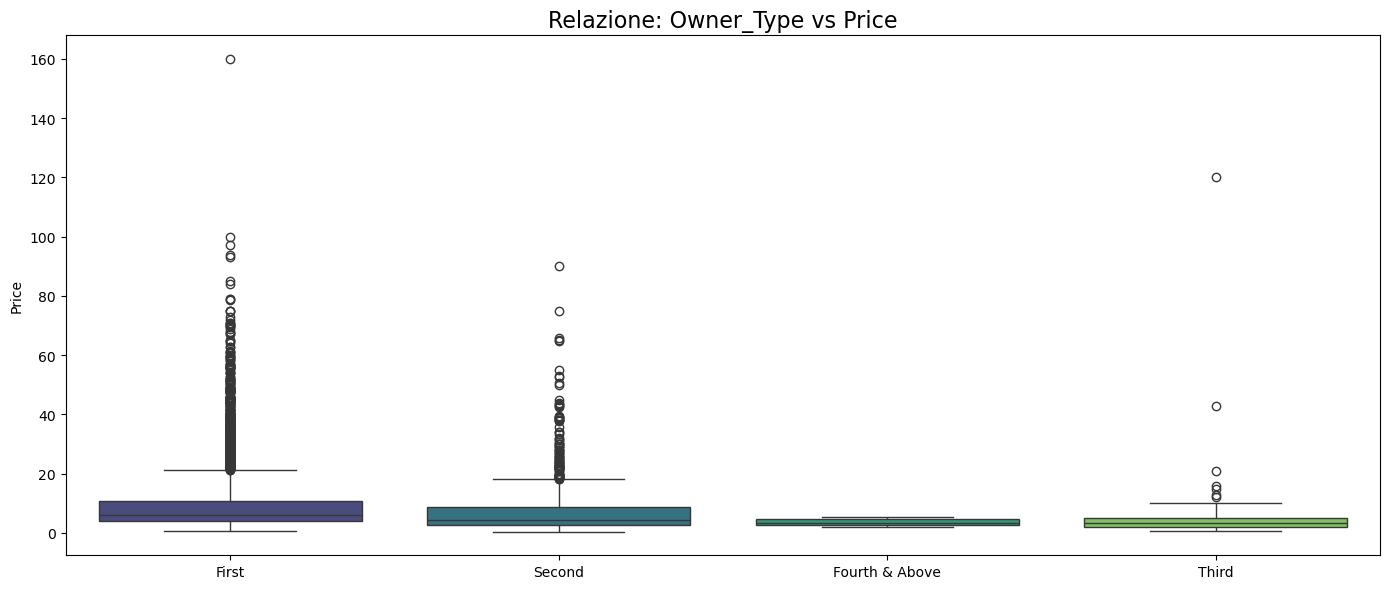

Statistiche per OWNER_TYPE:
                count   mean  median    std
Owner_Type                                 
First            4766  10.14    6.00  11.48
Second            886   8.04    4.54   9.75
Fourth & Above      7   3.57    3.25   1.37
Third              86   5.98    3.25  13.62


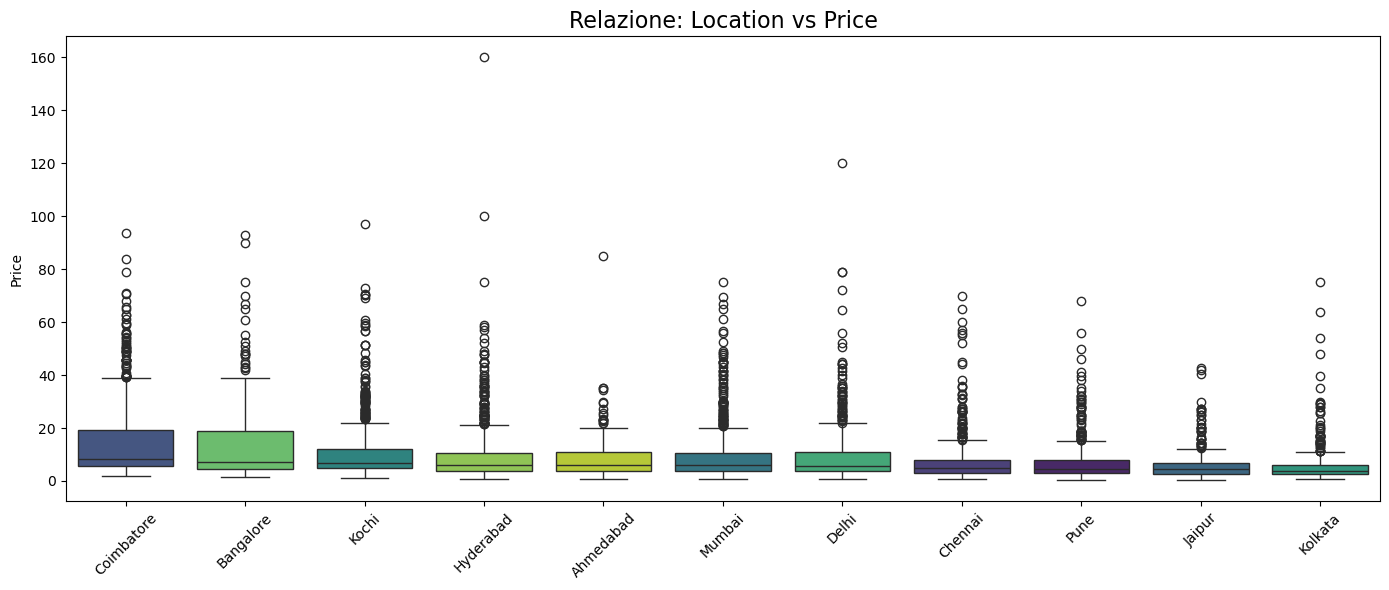

Statistiche per LOCATION:
            count   mean  median    std
Location                               
Coimbatore    628  15.16    8.36  14.93
Bangalore     347  13.64    7.20  14.47
Kochi         635  11.35    6.82  11.93
Hyderabad     702  10.09    6.00  12.15
Ahmedabad     215   8.66    6.00   8.50
Mumbai        751   9.62    5.91  10.27
Delhi         535   9.91    5.70  11.67
Chennai       457   8.05    4.80   9.60
Pune          567   7.14    4.50   7.77
Jaipur        390   6.08    4.35   5.95
Kolkata       518   5.77    3.78   7.02


In [ ]:
cat_cols = ['Transmission', 'Fuel_Type', 'Owner_Type', 'Location']

for col in cat_cols:
    stat = df_clean.groupby(col)['Price'].agg(['count', 'mean', 'median', 'std'])
    
    stat = stat.sort_values(by='median', ascending=False)
    
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=col, y='Price', data=df_clean, order=stat.index, palette='viridis', hue=col)
    plt.title(f'Relazione: {col} vs Price', fontsize=16)
    plt.ylabel('Price')
    plt.xlabel('')
    
    if len(stat) > 5:
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()
    
    print(f"Statistiche per {col.upper()}:")
    print(stat.round(2))

Notiamo varie cose:
- auto 'Automatic' in media hanno un prezzo maggiore (2,77 Lakh) delle auto 'Manual' (1.74 Lakh)
- auto che fanno uso di 'Diesel' come carburante hanno un prezzo maggiore in media di quelle che fanno uso di 'Petrol' (2.32 vs 1.70 Lahk)
- auto che hanno avuto meno proprietari hanno un prezzo maggiore in media
- la `Location` non sembra influenzare significativamente il prezzo

Mettiamo a confronto `Transmission` con `Fuel_Type`:

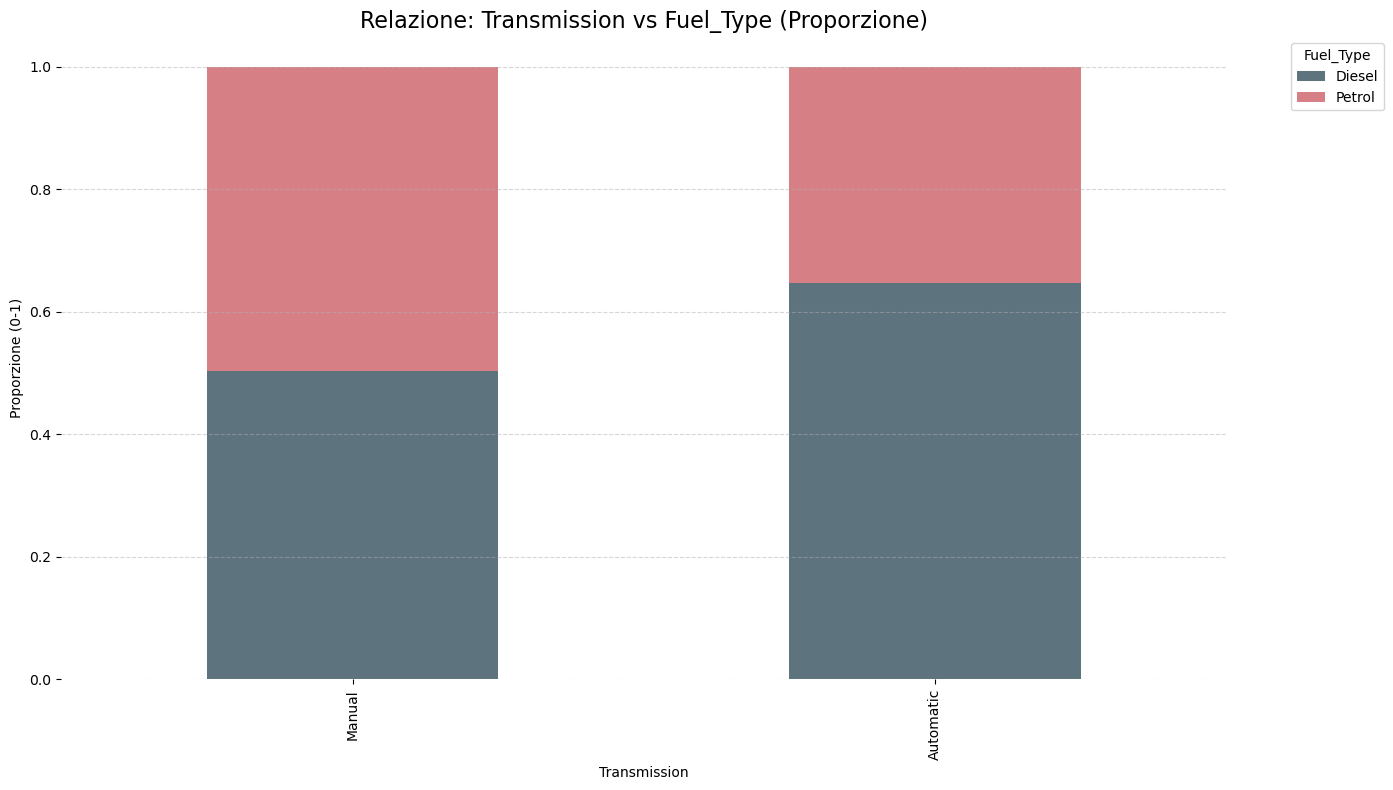

In [ ]:
cat1 = 'Transmission'
cat2 = 'Fuel_Type'

cross_tab_prop = pd.crosstab(df_clean[cat1], df_clean[cat2], normalize='index')
cross_tab_prop = cross_tab_prop.sort_values(by='Diesel', ascending=True)

ax = cross_tab_prop.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#5D737E', '#D68086'])

plt.title(f'Relazione: {cat1} vs {cat2} (Proporzione)', fontsize=16)
plt.ylabel('Proporzione (0-1)')
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.box(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Sembra che le auto automatiche usino maggiormente il Diesel.

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_clean['Transmission'], df_clean['Fuel_Type'])

print("--- Tabella di Contingenza (Transmission vs Fuel_Type) ---")
print(contingency_table)
print("\n" + "="*50 + "\n")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Statistica Chi-Quadro: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

if p < 0.05:
    print("Risultato: Le variabili sono statisticamente DIPENDENTI (C'è relazione).")
else:
    print("Risultato: Le variabili sono INDIPENDENTI (Non c'è relazione).")

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"V di Cramér (Forza della relazione 0-1): {cramer_v:.3f}")

--- Tabella di Contingenza (Transmission vs Fuel_Type) ---
Fuel_Type     Diesel  Petrol
Transmission                
Automatic       1097     596
Manual          2043    2009


Statistica Chi-Quadro: 99.01
P-Value: 0.0000
Risultato: Le variabili sono statisticamente DIPENDENTI (C'è relazione).
V di Cramér (Forza della relazione 0-1): 0.131


C'è una relazione molto debole. Il modello ha bisogno di entrambe le colonne per capire il prezzo. 

Riassumiamo tutto quello che abbiamo scoperto in questa analisi:
- Vi è una correlazione molto positiva tra `Power` e `Price`
- Vi è una correlazione molto positiva tra `Engine` e `Price`
- Sia `Power` e sia `Engine` influenzano `Price` allo stesso modo, questo perché più un auto è potente e più costa;
- Vi è una correlazione negativa tra `Age` e `Price`, banalmente più l'auto invecchia e meno costa;
- Vi è una correlazione negativa tra `Mileage` e `Price`, motori più efficienti sono legati ad auto più economiche e non troppo potenti, auto costone sono molto potenti e consumano di più;
- Vi è una correlazione negativa tra `Owner_Type` e `Price`, un auto che ha avuto più proprietari potrebbe essere in condizioni peggiori oppure essere più vecchia;
- La `location` non sembra influenzare il prezzo;
- Sembra che auto più costose utilizzino il 'Diesel' invece del 'Petrol'.

**Trasformazione**

L'applicazione della trasformazione $\log(Pric\text{e})$ è un passaggio fondamentale per preparare i dati alla modellazione di regressione per le seguenti ragioni:
- Normalizzazione della Distribuzione: La regressione lineare assume che i residui del modello siano distribuiti normalmente. Le variabili target fortemente asimmetriche, come il nostro prezzo, violano questa assunzione. La trasformazione logaritmica agisce per ridurre l'asimmetria, rendendo la distribuzione del prezzo (in scala logaritmica) molto più vicina alla normale.
- Gestione degli Outlier: La trasformazione riduce l'influenza degli outlier estremi (le auto di lusso a $120$ e $160$). Sulla scala logaritmica, la distanza tra $100$ e $160$ è molto minore che sulla scala originale, mitigando il loro impatto sul modello senza doverli eliminare.
- Relazione Moltiplicativa: Nella previsione del prezzo (soprattutto in ambito economico), la relazione tra prezzo e predittori è spesso moltiplicativa, non additiva. 

L'uso di $\log(\text{Price})$ sul lato sinistro dell'equazione della regressione permette al modello di interpretare i coefficienti come cambiamenti percentuali nel prezzo per ogni variazione unitaria del predittore, il che è più sensato economicamente.

In [ ]:
df['Price'] = np.log1p(df['Price'])

print("Trasformazione applicata a Price.")

Trasformazione applicata a Price.


---

## Inferenza statistica

Adesso che conosciamo bene il nostro dataset, le nostre variabili e come essere sono correlate, possiamo fare qualche inferenza riguardo la nostra popolazione.

Dobbiamo partire da delle osservazioni sorte durante l'analisi:
- Transmission influenza Price
- La variabile Price segue una distribuzione Gaussiana dopo la trasformazione logaritmica
- Le auto 'Manual' sono più di quelle 'Automatic'
- Il tipo di proprietario influenza il prezzo

**1. Test**

Sembra che il tipo di cambio influenzi il prezzo.

Vediamo l'intervallo di confidenza:

In [ ]:
from scipy import stats

print(f"Gruppi di trasmissione: {df_clean['Transmission'].unique()}\n")

group_per_transmission =  df_clean.groupby('Transmission')['Price']
mean = group_per_transmission.mean()
std = group_per_transmission.std()

count = group_per_transmission.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_manual = stats.norm.interval(confidence_level, loc=mean['Manual'], scale=std_err['Manual'])
interval_automatic = stats.norm.interval(confidence_level, loc=mean['Automatic'], scale=std_err['Automatic'])

print("---- Media per gruppo di tramissione ----")
print(f"Manual:\t\t {mean['Manual']:.2f}\nAutomatic:\t {mean['Automatic']:.2f}\n")

print("---- Std Dev per gruppo di tramissione ----")
print(f"Manual:\t\t {std['Manual']:.2f}\nAutomatic:\t {std['Automatic']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"Manual:\t\t {std_err['Manual']:.2f}\nAutomatic:\t {std_err['Automatic']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"Manual:\t\t ({interval_manual[0]:.2f}, {interval_manual[1]:.2f})")
print(f"Automatic:\t ({interval_automatic[0]:.2f}, {interval_automatic[1]:.2f})\n")

Gruppi di trasmissione: ['Manual' 'Automatic']

---- Media per gruppo di tramissione ----
Manual:		 5.48
Automatic:	 19.96

---- Std Dev per gruppo di tramissione ----
Manual:		 3.52
Automatic:	 15.99

---- Std Err per gruppo di tramissione ----
Manual:		 0.06
Automatic:	 0.39

---- Confidence Interval di price per gruppo di tramissione ----
Manual:		 (5.37, 5.59)
Automatic:	 (19.20, 20.72)



Eseguiamo un Two Sample T-Test verificare l'affermazione vista in precedenza, ovvero se c'è una differenza significatica tra la media del prezzo delle auto Automatiche e quello delle Manuali.

In [ ]:
import numpy as np
from scipy import stats

manual = df[df['Transmission'] == 'Manual']['Price']
automatic = df[df['Transmission'] == 'Automatic']['Price']

t_stat, p_value = stats.ttest_ind(manual, automatic)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")

Test statistic: -63.34
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.


Abbiamo concluso che in media un auto Automatica costa il 57% in più di un auto Manuale, una differenza di circa 1 Lahks.

**2. test**

Sembra che Price adesso tenda ad una ditribuzione Gaussiana:

In [ ]:
from scipy.stats import normaltest

statistic, p_value = normaltest(df['Price'])

alpha = 0.05

print(f"Test statistic: {statistic:.2f}")
print(f"P-value: {p_value:.10f}")

if p_value > alpha:
    print("E' Gaussiano. L'ipotesi H0 è vera.")
else:
    print("H0 rifiutata")

Test statistic: 476.69
P-value: 0.0000000000
H0 rifiutata


Il test del Chi-square rifiuta l'ipotesi quando non segue la normale, significa che Price non tende ad una distribuzione Gaussiana.

Ma andiamo a vedere un Q-Q plot:

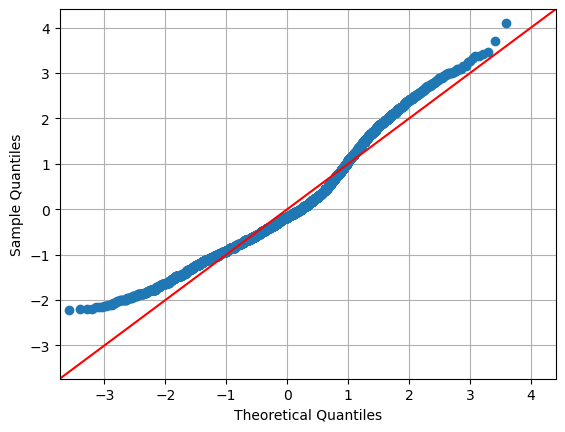

In [ ]:
import statsmodels.api as sm

sm.qqplot(df['Price'], fit=True, line='45')
plt.grid()
plt.show()

Senza dubbio abbiamo avuto un netto miglioramto rispetto alla distribuzione prima della trasformazione. 

Il nostoro modello ne trartà vantaggio

**3. test**

Abbiamo notato che nel nostro dataset le auto a cambio Manuale sono più di quelle automatiche, vediamo se è così pure nella nostra popolazione:

In [ ]:
import statsmodels.api as sm
import numpy as np

group_per_transmission =  df_clean.groupby('Transmission')['Price']
count = group_per_transmission.count()

total = df['Transmission'].count()

confidence_level = 0.95

proportion = count['Manual'] / total
conf_interval_man = sm.stats.proportion_confint(count['Manual'], total, alpha=1-confidence_level, method='normal')
conf_interval_aut = sm.stats.proportion_confint(count['Automatic'], total, alpha=1-confidence_level, method='normal')

print(f"---- Sample Proportion ----")
print(f"Manual:\t\t {proportion:.2f}")
print(f"Automatic:\t {1 - proportion:.2f}\n")

print("---- Confidence Interval of Proportion ----")
print(f"Manual:\t\t ({conf_interval_man[0]:.2f}, {conf_interval_man[1]:.2f})")
print(f"Automatic:\t ({conf_interval_aut[0]:.2f}, {conf_interval_aut[1]:.2f})\n")

---- Sample Proportion ----
Manual:		 0.67
Automatic:	 0.33

---- Confidence Interval of Proportion ----
Manual:		 (0.66, 0.69)
Automatic:	 (0.27, 0.29)



A quanto pare è vero, per verificarlo abbiamo trovato un test statistico che confronta due proporzioni nello stesso sample, lo z-Test:

In [ ]:
import statsmodels.api as sm
import numpy as np

group_per_transmission =  df_clean.groupby('Transmission')['Price']
count = group_per_transmission.count()

total_count = count['Manual'] + count['Automatic']

null_hypothesis = 0.50
alpha = 0.05

z_stat, p_value = sm.stats.proportions_ztest(count=count['Manual'], nobs=total_count,  value=null_hypothesis)

prop_manual = count['Manual'] / total_count

print("---- Test Z per proporzione Trasmissione ----")
print(f"Proporzione Ipotizzata:\t {null_hypothesis}")
print(f"Proporzione Manuale: {prop_manual:.4f}\n")

print(f"Z-Test statistic: {z_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")
else:
    print("Conclusione: non c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")

---- Test Z per proporzione Trasmissione ----
Proporzione Ipotizzata:	 0.5
Proporzione Manuale: 0.7053

Z-Test statistic: 34.13
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.


Esatto, c'è una differenza significativa.

**4. test**

Abbiamo notato che il tipo di proprietario influenza il prezzo, ovvero meno proprietari ha avuto l'auto e più costa.

In [ ]:
from scipy import stats

print(f"Gruppi di proprietario: {df_clean['Owner_Type'].unique()}\n")

group_per_owner =  df.groupby('Owner_Type')['Price']
mean = group_per_owner.mean()
std = group_per_owner.std()

count = group_per_owner.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_firt_ow = stats.norm.interval(confidence_level, loc=mean['First'], scale=std_err['First'])
interval_second_ow = stats.norm.interval(confidence_level, loc=mean['Second'], scale=std_err['Second'])
interval_third_ow = stats.norm.interval(confidence_level, loc=mean['Third'], scale=std_err['Third'])

print("---- Media per gruppo di Owner_Type ----")
print(f"Fisrt:\t\t {mean['First']:.2f}")
print(f"Second:\t\t {mean['Second']:.2f}")
print(f"Third:\t\t {mean['Third']:.2f}\n")

print("---- Std Dev per gruppo di Owner_Type ----")
print(f"First:\t\t {std['First']:.2f}")
print(f"Second:\t\t {std['Second']:.2f}")
print(f"Third:\t\t {std['Third']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"First:\t\t {std_err['First']:.2f}")
print(f"Second:\t\t {std_err['Second']:.2f}")
print(f"Third:\t\t {std_err['Third']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"First:\t\t ({interval_firt_ow[0]:.2f}, {interval_firt_ow[1]:.2f})")
print(f"Second:\t\t ({interval_second_ow[0]:.2f}, {interval_second_ow[1]:.2f})")
print(f"Third:\t\t ({interval_third_ow[0]:.2f}, {interval_third_ow[1]:.2f})\n")

Gruppi di proprietario: ['First' 'Second' 'Fourth & Above' 'Third']

---- Media per gruppo di Owner_Type ----
Fisrt:		 2.08
Second:		 1.80
Third:		 1.38

---- Std Dev per gruppo di Owner_Type ----
First:		 0.73
Second:		 0.77
Third:		 0.72

---- Std Err per gruppo di tramissione ----
First:		 0.01
Second:		 0.02
Third:		 0.07

---- Confidence Interval di price per gruppo di tramissione ----
First:		 (2.06, 2.10)
Second:		 (1.75, 1.85)
Third:		 (1.25, 1.51)



Sembra che il prezzo medio cambi in base al tipo di propreitario: meno proprietari ha l'auto e più vale.

Eseguiamo un Two Sample T-Test ma solamente tra i campioni 'First' e 'Second', essendo quelli più presenti nel dataset:

In [ ]:
import numpy as np
from scipy import stats

first = df_clean[df_clean['Owner_Type'] == 'First']['Price']
second = df_clean[df_clean['Owner_Type'] == 'Second']['Price']

t_stat, p_value = stats.ttest_ind(first, second)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")

Test statistic: 5.11
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.


Verificato.

In [ ]:
df_clean.to_csv('dataset-part1-TEST.csv', index=False)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5745 non-null   object 
 1   Model              5745 non-null   object 
 2   Location           5745 non-null   object 
 3   Age                5745 non-null   int64  
 4   Kilometers_Driven  5745 non-null   float64
 5   Fuel_Type          5745 non-null   object 
 6   Transmission       5745 non-null   object 
 7   Owner_Type         5745 non-null   object 
 8   Mileage            5745 non-null   int64  
 9   Engine             5745 non-null   int64  
 10  Power              5745 non-null   float64
 11  Seats              5745 non-null   float64
 12  Price              5745 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 583.6+ KB


In [ ]:
df_clean['Brand'].value_counts()